In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

# VEST ME 2016

## VEST's Documentation File

Election results by township from Maine Bureau of Corporations, Elections & Commissions (https://www.maine.gov/sos/cec/elec/results/index.html)  
Election results by ward from municipal reports for Auburn, Augusta, Belfast, Biddeford, Ellsworth, Gorham, Harpswell, Lewiston, Portland, Saco, Sanford, South Portland, Westbrook.  
  
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. Voting District shapefiles were available for Androscoggin, Cumberland, Kennebec, Sagadahoc, Waldo, York. County Subdivision shapefiles were used instead for Aroostook, Franklin, Hancock, Knox, Lincoln, Oxford, Penobscot, Piscataquis, Somerset, Washington.  
  
VTDs were merged for Bath, Brunswick, Waterville as statewide votes are not reported by ward. VTDs for Biddeford, Ellsworth, Gorham, Harpswell were sourced from township ward maps.  
  
Absentee votes were reported at the township level for Auburn, Lewiston, Gorham, Harpswell, Portland, Westbrook, Augusta, Belfast, Sanford, South Portland. These were distributed to precincts based on the precinct's share of the township vote for each candidate. Military and overseas ballots (UOCAVA) were reported at the state level. These were distributed to precincts based on the precinct's share of the statewide vote for each candidate.  
  
For Biddeford, Ellsworth, Lewiston, Portland, Sanford, South Portland write-in votes reported at the township level were apportioned to precincts in the same shares that the total vote was split among precincts within the township.  
  
The state reported 987 votes from Portland for Jill Stein (G). The precinct-level votes in the Portland city report add up to 995 total votes for Stein.  
  
Maine includes more than 400 unorganized townships and islands that do not lie within municipal bounds. While some are designated separately, the U.S. Census Bureau combines most of these into larger unorganized territories within each county. Voters in unorganized townships are assigned to nearby incorporated townships. In some cases these votes are reported separately while in others they are combined into the total vote reported from the central voting location. The shapefile has been modified accordingly with boundaries from the Town Boundaries shapefile provided by the Maine Office of GIS. For unorganized territories that are unpopulated or otherwise do not appear to have any registered voters the Census boundaries have been retained unaltered.  
  
G16PREDCLI - Hillary Clinton (Democratic Party)  
G16PRERTRU - Donald J. Trump (Republican Party)  
G16PRELJOH - Gary Johnson (Libertarian Party)  
G16PREGSTE - Jill Stein (Green Party)  
G16PREOOTH - Write-in Votes  

## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/me_2016/me_2016.shp")

In [3]:
vest_shp.shape

(609, 9)

In [4]:
vest_shp.head(10)

,STATEFP,COUNTYFP,NAME,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI,geometry
0,23,Androscoggin,Durham,1093,1268,148,44,0,"POLYGON Z ((-70.22462 43.97858 0.00000, -70.21..."
1,23,Androscoggin,Auburn Ward 1,1110,1045,185,40,10,"POLYGON Z ((-70.30199 44.17025 0.00000, -70.30..."
2,23,Androscoggin,Auburn Ward 2,1346,1060,164,51,7,"POLYGON Z ((-70.30412 44.10828 0.00000, -70.30..."
3,23,Androscoggin,Auburn Ward 3,954,1131,149,33,11,"POLYGON Z ((-70.31624 44.09664 0.00000, -70.31..."
4,23,Androscoggin,Auburn Ward 4,805,891,87,38,10,"POLYGON Z ((-70.31467 44.03755 0.00000, -70.31..."
5,23,Androscoggin,Auburn Ward 5,1126,1208,157,47,5,"POLYGON Z ((-70.25951 44.04280 0.00000, -70.25..."
6,23,Androscoggin,Greene,817,1545,151,26,0,"POLYGON Z ((-70.21274 44.17936 0.00000, -70.21..."
7,23,Androscoggin,Lisbon,1711,2754,283,84,17,"POLYGON Z ((-70.15789 44.00607 0.00000, -70.15..."
8,23,Androscoggin,Livermore,475,705,64,22,29,"POLYGON Z ((-70.27869 44.41517 0.00000, -70.26..."
9,23,Androscoggin,Mechanic Falls,519,873,118,24,5,"POLYGON Z ((-70.45116 44.09455 0.00000, -70.45..."


<AxesSubplot:>

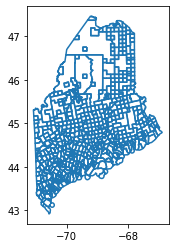

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Downloaded SOS Election Results using the same file linked by VEST, and cleaned them in Excel. Results do not require pivoting. 

In [6]:
election_results = pd.read_csv('./raw-from-source/SOS/president_clean.csv')

In [7]:
election_results.head(1)

,County,Precinct,"Clinton, Hillary R.","Johnson, Gary","Stein, Jill","Trump, Donald J.","Castle, Darrell L.","Fox, Cherunda L.","Kotlikoff, Laurence J.","McMullin, David Evan"
0,AND,AUBURN,5296.0,737.0,207.0,5325.0,4.0,0.0,0.0,39.0


In [8]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Maine"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
me_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "23" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [9]:
me_fips_dict

{'ANDROSCOGGIN': '001',
 'AROOSTOOK': '003',
 'CUMBERLAND': '005',
 'FRANKLIN': '007',
 'HANCOCK': '009',
 'KENNEBEC': '011',
 'KNOX': '013',
 'LINCOLN': '015',
 'OXFORD': '017',
 'PENOBSCOT': '019',
 'PISCATAQUIS': '021',
 'SAGADAHOC': '023',
 'SOMERSET': '025',
 'WALDO': '027',
 'WASHINGTON': '029',
 'YORK': '031'}

In [10]:
election_results["County"].unique()

array(['AND', 'ARO', 'CUM', 'FRA', 'HAN', 'KEN', 'KNO', 'LIN', 'OXF',
       'PEN', 'PIS', 'SAG', 'SOM', 'WAL', 'WAS', 'YOR'], dtype=object)

In [11]:
County_dict = {
    'AND':'ANDROSCOGGIN', 
    'ARO':'AROOSTOOK', 
    'CUM':'CUMBERLAND', 
    'FRA':'FRANKLIN', 
    'HAN':'HANCOCK', 
    'KEN':'KENNEBEC', 
    'KNO':'KNOX', 
    'LIN':'LINCOLN', 
    'OXF':'OXFORD',
    'PEN':'PENOBSCOT', 
    'PIS':'PISCATAQUIS', 
    'SAG':'SAGADAHOC', 
    'SOM':'SOMERSET', 
    'WAL':'WALDO', 
    'WAS':'WASHINGTON', 
    'YOR':'YORK'
}

In [12]:
#Use the dictionary to change the names
election_results["County"]=election_results["County"].map(County_dict).fillna(election_results["County"])

In [13]:
#Map to the correct FIP
election_results["County_FIPS"]=election_results["County"].map(me_fips_dict).fillna(election_results["County"])

#Print out the FIPS to make sure they all are in the correct format
election_results["County"].unique()

array(['ANDROSCOGGIN', 'AROOSTOOK', 'CUMBERLAND', 'FRANKLIN', 'HANCOCK',
       'KENNEBEC', 'KNOX', 'LINCOLN', 'OXFORD', 'PENOBSCOT',
       'PISCATAQUIS', 'SAGADAHOC', 'SOMERSET', 'WALDO', 'WASHINGTON',
       'YORK'], dtype=object)

In [14]:
sum_column = election_results["Castle, Darrell L."] + election_results["Fox, Cherunda L."] + election_results["Kotlikoff, Laurence J."] + election_results["McMullin, David Evan"]
election_results["G16PREOWRI"] = sum_column

In [15]:
election_results = election_results.drop(["Castle, Darrell L.", "Fox, Cherunda L.","Kotlikoff, Laurence J.","McMullin, David Evan"], axis=1)

In [16]:
election_results = election_results[["County","Precinct","County_FIPS","Clinton, Hillary R.","Trump, Donald J.","Johnson, Gary","Stein, Jill","G16PREOWRI"]]

In [17]:
election_results.columns = ["County","Precinct","County_FIPS","G16PREDCLI","G16PRERTRU","G16PRELJOH","G16PREGSTE","G16PREOWRI"]

In [18]:
election_results.head(1)

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,ANDROSCOGGIN,AUBURN,001,5296.0,5325.0,737.0,207.0,43.0


In [19]:
vest_shp['COUNTYFP']=vest_shp['COUNTYFP'].str.upper()
vest_shp["County_FIPS"]=vest_shp["COUNTYFP"].map(me_fips_dict).fillna(vest_shp["COUNTYFP"])
vest_shp

,STATEFP,COUNTYFP,NAME,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI,geometry,County_FIPS
0,23,ANDROSCOGGIN,Durham,1093,1268,148,44,0,"POLYGON Z ((-70.22462 43.97858 0.00000, -70.21...",001
1,23,ANDROSCOGGIN,Auburn Ward 1,1110,1045,185,40,10,"POLYGON Z ((-70.30199 44.17025 0.00000, -70.30...",001
2,23,ANDROSCOGGIN,Auburn Ward 2,1346,1060,164,51,7,"POLYGON Z ((-70.30412 44.10828 0.00000, -70.30...",001
3,23,ANDROSCOGGIN,Auburn Ward 3,954,1131,149,33,11,"POLYGON Z ((-70.31624 44.09664 0.00000, -70.31...",001
4,23,ANDROSCOGGIN,Auburn Ward 4,805,891,87,38,10,"POLYGON Z ((-70.31467 44.03755 0.00000, -70.31...",001
...,...,...,...,...,...,...,...,...,...,...
604,23,WASHINGTON,East Central Washington,0,0,0,0,0,"POLYGON Z ((-67.61180 44.97593 0.00000, -67.61...",029
605,23,WASHINGTON,Whiting/Trescott,140,168,10,4,2,"POLYGON Z ((-67.14649 44.87834 0.00000, -67.13...",029
606,23,PENOBSCOT,Carroll,17,72,2,3,0,"POLYGON Z ((-68.11447 45.44604 0.00000, -68.11...",019
607,23,PENOBSCOT,Old Town,2046,1517,246,91,9,"POLYGON Z ((-68.64560 44.94170 0.00000, -68.64...",019


## Compare vote totals before allocation

In [20]:
races = [x for x in vest_shp.columns if 'G16' in x]
races

['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH', 'G16PREGSTE', 'G16PREOWRI']

In [21]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

747935
743941.0


## Function to assign absentee votes by town

In [22]:
def assign_absentee(filtered_election):
    to_dole_out = filtered_election[filtered_election['Precinct']=='Absentee']
    to_dole_out_totals = to_dole_out
    filtered_election = filtered_election[filtered_election.Precinct != 'Absentee']
    #Create a df with the county-by-county sums of precinct-level votes, this will be used in the allocation, clean the index
    precinct_specific_totals = pd.DataFrame(filtered_election.groupby(["County"]).sum())
    precinct_specific_totals.reset_index(inplace=True,drop=False)
    filtered_election.reset_index(inplace=True,drop=True)
    
    for race in races:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        filtered_election.loc[:,add_var]=0.0
        filtered_election.loc[:,rem_var]=0.0
        filtered_election.loc[:,floor_var]=0.0
    
    for index, row in filtered_election.iterrows():
        #No countywide votes for 510
        if row["County"] in to_dole_out['County'].unique():
            for race in races:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the county
                county_id = row["County"]
                #Get the denominator for the allocation (the precinct vote totals)
                denom = precinct_specific_totals.loc[precinct_specific_totals["County"]==county_id][race]
                #Get one of the numerators, how many countywide votes to allocate
                numer = to_dole_out_totals.loc[to_dole_out_totals["County"]==county_id][race]

                #Get the vote totals for this race in this precinct
                val = filtered_election.loc[index,race]

                #Get the vote share, the precincts % of total precinct votes in the county times votes to allocate
                if float(denom) !=0:
                    vote_share = (float(val)/float(denom))*float(numer)
                else:
                    vote_share = 0


                filtered_election.loc[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                filtered_election.loc[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                filtered_election.loc[index,floor_var] = np.floor(vote_share)
                
    #After the first pass through, get the sums of the races by county            
    first_allocation = pd.DataFrame(filtered_election.groupby(["County"]).sum())

    #Now we want to iterate county by county to work on rounding
    county_list = list(to_dole_out_totals["County"].unique()) 

    #Iterate over the counties
    for county in county_list:
        for race in races:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals["County"]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in filtered_election.loc[filtered_election["County"]==county][rem_var].nlargest(to_go).index:
                filtered_election.loc[index,add_var] = np.ceil(filtered_election.loc[index,add_var])

    #Iterate over every race again
    for race in races:
        add_var = race+"_add"
        #Round every allocation down
        filtered_election.loc[:,add_var]=np.floor(filtered_election.loc[:,add_var])
        #Add every allocation to the total
        filtered_election.loc[:,race]+=filtered_election.loc[:,add_var]


    #Filter back down to the original columns
    filtered_election = filtered_election[list(election_results.columns)]
    return filtered_election

## Assign votes by ward for Auburn, Augusta, Belfast, Biddeford, Ellsworth, Gorham, Harpswell, Lewiston, Portland, Saco, Sanford, South Portland, Westbrook.  
  
VEST:  
-Election results by ward from municipal reports for Auburn, Augusta, Belfast, Biddeford, Ellsworth, Gorham, Harpswell, Lewiston, Portland, Saco, Sanford, South Portland, Westbrook.  
-Absentee votes were reported at the township level for Auburn, Lewiston, Gorham, Harpswell, Portland, Westbrook, Augusta, Belfast, Sanford, South Portland.  
-For Biddeford, Ellsworth, Lewiston, Portland, Sanford, South Portland write-in votes reported at the township level were apportioned to precincts in the same shares that the total vote was split among precincts within the township.

### Auburn
Source-https://www.auburnmaine.gov/CMSContent/City_Clerk/2016%20State%20of%20Maine%20General%20Election%20Official.pdf

In [23]:
Auburn_dict = {'County':['ANDROSCOGGIN', 'ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN'],
        'Precinct':['Auburn Ward 1', 'Auburn Ward 2', 'Auburn Ward 3','Auburn Ward 4','Auburn Ward 5','Absentee'],
        'County_FIPS':['001', '001','001','001','001','001'],
        'G16PREDCLI':[595,721,511,431,603,2435],
        'G16PRERTRU':[727,738,787,620,841,1612],
        'G16PRELJOH':[135,119,108,63,114,198],
        'G16PREGSTE':[29,37,24,28,34,55],
        'G16PREOWRI':[7,5,8,7,4,12]
       }
Auburn_df = pd.DataFrame(Auburn_dict)
Auburn_df = assign_absentee(Auburn_df)
Auburn_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,ANDROSCOGGIN,Auburn Ward 1,001,1101.0,1043.0,184.0,40.0,10.0
1,ANDROSCOGGIN,Auburn Ward 2,001,1335.0,1058.0,163.0,50.0,7.0
2,ANDROSCOGGIN,Auburn Ward 3,001,946.0,1129.0,148.0,33.0,11.0
3,ANDROSCOGGIN,Auburn Ward 4,001,798.0,889.0,86.0,38.0,10.0
4,ANDROSCOGGIN,Auburn Ward 5,001,1116.0,1206.0,156.0,46.0,5.0


### Augusta
source-https://cms6.revize.com/revize/augustame/docs/Elections/NOVEMBER_8_2016_-_CITY_OF_AUGUSTA%20-%20ELECTION%20RESULTS.pdf

In [24]:
Augusta_dict = {'County':['KENNEBEC', 'KENNEBEC','KENNEBEC','KENNEBEC','KENNEBEC'],
        'Precinct':['Augusta Ward 1', 'Augusta Ward 2', 'Augusta Ward 3','Augusta Ward 4','Absentee'],
        'County_FIPS':['011', '011','011','011','011'],
        'G16PREDCLI':[630,647,589,637,1893],
        'G16PRERTRU':[509,592,750,772,1182],
        'G16PRELJOH':[76,80,87,105,153],
        'G16PREGSTE':[29,33,43,36,51],
        'G16PREOWRI':[8,6,0,0,1]
       }
Augusta_df = pd.DataFrame(Augusta_dict)
Augusta_df = assign_absentee(Augusta_df)
Augusta_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,KENNEBEC,Augusta Ward 1,011,1107.0,738.0,110.0,39.0,9.0
1,KENNEBEC,Augusta Ward 2,011,1136.0,859.0,115.0,45.0,6.0
2,KENNEBEC,Augusta Ward 3,011,1034.0,1088.0,125.0,59.0,0.0
3,KENNEBEC,Augusta Ward 4,011,1119.0,1120.0,151.0,49.0,0.0


### Belfast
source-https://www.cityofbelfast.org/DocumentCenter/View/1815/City-Clerks-Return-Election-Results-Certified?bidId=

In [25]:
Belfast_dict = {'County':['WALDO', 'WALDO','WALDO','WALDO'],
        'Precinct':['Belfast Ward 1/2', 'Belfast Ward 3/4', 'Belfast Ward 5','Absentee'],
        'County_FIPS':['027', '027','027','027'],
        'G16PREDCLI':[632,614,229,876],
        'G16PRERTRU':[245,387,288,321],
        'G16PRELJOH':[38,60,26,53],
        'G16PREGSTE':[32,30,15,23],
        'G16PREOWRI':[3,2,2,0]
       }
Belfast_df = pd.DataFrame(Belfast_dict)
Belfast_df = assign_absentee(Belfast_df)
Belfast_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,WALDO,Belfast Ward 1/2,027,1007.0,330.0,54.0,42.0,3.0
1,WALDO,Belfast Ward 3/4,027,979.0,522.0,86.0,39.0,2.0
2,WALDO,Belfast Ward 5,027,365.0,389.0,37.0,19.0,2.0


### Biddeford
source-https://www.biddefordmaine.org/DocumentCenter/View/180/November-8-2016---State-General-and-Referendum-Election-and-Municipal-Referendum-Charter-Revisions-Election-PDF

In [26]:
Biddeford_dict = {'County':['YORK','YORK','YORK','YORK','YORK','YORK','YORK'],
        'Precinct':['Biddeford 1','Biddeford 2','Biddeford 3','Biddeford 4','Biddeford 5','Biddeford 6','Biddeford 7'],
        'County_FIPS':['031','031','031','031','031','031','031'],
        'G16PREDCLI':[1359,699,979,618,593,639,618],
        'G16PRERTRU':[741,491,638,486,413,481,479],
        'G16PRELJOH':[80,57,86,71,56,65,56],
        'G16PREGSTE':[32,33,35,42,28,31,40],
        'G16PREOWRI':[54,25,44,29,21,23,26]
       }
Biddeford_df = pd.DataFrame(Biddeford_dict)
Biddeford_df

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,YORK,Biddeford 1,031,1359,741,80,32,54
1,YORK,Biddeford 2,031,699,491,57,33,25
2,YORK,Biddeford 3,031,979,638,86,35,44
3,YORK,Biddeford 4,031,618,486,71,42,29
4,YORK,Biddeford 5,031,593,413,56,28,21
5,YORK,Biddeford 6,031,639,481,65,31,23
6,YORK,Biddeford 7,031,618,479,56,40,26


### Ellsworth
source-https://www.ellsworthmaine.gov/wp-content/uploads/2016/11/11-8-16-Official-Election-Results.pdf

In [27]:
Ellsworth_dict = {'County':['HANCOCK','HANCOCK','HANCOCK','HANCOCK'],
        'Precinct':['Ellsworth 1',"Ellsworth 2/Fletcher's Landing",'Ellsworth 3','Ellsworth 4'],
        'County_FIPS':['009','009','009','009'],
        'G16PREDCLI':[720,271,238,581],
        'G16PRERTRU':[728,351,375,659],
        'G16PRELJOH':[105,39,31,67],
        'G16PREGSTE':[38,16,7,29],
        'G16PREOWRI':[35,10,5,24]
       }
Ellsworth_df = pd.DataFrame(Ellsworth_dict)
Ellsworth_df

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,HANCOCK,Ellsworth 1,009,720,728,105,38,35
1,HANCOCK,Ellsworth 2/Fletcher's Landing,009,271,351,39,16,10
2,HANCOCK,Ellsworth 3,009,238,375,31,7,5
3,HANCOCK,Ellsworth 4,009,581,659,67,29,24


### Gorham
source-https://www.gorham-me.org/town-clerk/pages/2016-elections

In [28]:
Gorham_dict = {'County':['CUMBERLAND', 'CUMBERLAND','CUMBERLAND','CUMBERLAND'],
        'Precinct':['Gorham 1-1', 'Gorham 1-2', 'Gorham 2','Absentee'],
        'County_FIPS':['005', '005','005','005'],
        'G16PREDCLI':[760,643,1450,2142],
        'G16PRERTRU':[615,634,1319,1377],
        'G16PRELJOH':[85,86,168,147],
        'G16PREGSTE':[29,32,46,54],
        'G16PREOWRI':[4,11,75,12]
       }
Gorham_df = pd.DataFrame(Gorham_dict)
Gorham_df = assign_absentee(Gorham_df)
Gorham_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,CUMBERLAND,Gorham 1-1,005,1330.0,945.0,122.0,44.0,5.0
1,CUMBERLAND,Gorham 1-2,005,1126.0,974.0,123.0,48.0,12.0
2,CUMBERLAND,Gorham 2,005,2539.0,2026.0,241.0,69.0,85.0


### Harpswell
source-File available upon request

In [29]:
Harpswell_dict = {'County':['CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND'],
        'Precinct':['Harpswell - Mainland','Harpswell - Great Island',"Harpswell - Orr's/Bailey",'Absentee'],
        'County_FIPS':['005','005','005','005'],
        'G16PREDCLI':[492,379,237,773],
        'G16PRERTRU':[401,384,192,339],
        'G16PRELJOH':[37,41,16,34],
        'G16PREGSTE':[25,12,1,13],
        'G16PREOWRI':[4,2,0,4]
       }
Harpswell_df = pd.DataFrame(Harpswell_dict)
Harpswell_df = assign_absentee(Harpswell_df)
Harpswell_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,CUMBERLAND,Harpswell - Mainland,005,835.0,540.0,50.0,34.0,7.0
1,CUMBERLAND,Harpswell - Great Island,005,644.0,517.0,56.0,16.0,3.0
2,CUMBERLAND,Harpswell - Orr's/Bailey,005,402.0,259.0,22.0,1.0,0.0


### Lewiston
source-https://www.lewistonmaine.gov/DocumentCenter/View/6818/11-08-2016--General-Election-Results?bidId=

In [30]:
Lewiston_dict = {'County':['ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN','ANDROSCOGGIN'],
        'Precinct':['Lewiston Ward 1','Lewiston Ward 2','Lewiston Ward 3','Lewiston Ward 4','Lewiston Ward 5','Lewiston Ward 6','Lewiston Ward 7','Absentee'],
        'County_FIPS':['001','001','001','001','001','001','001','001'],
        'G16PREDCLI':[836,728,814,554,446,582,572,3690],
        'G16PRERTRU':[535,1011,369,753,364,1045,810,2449],
        'G16PRELJOH':[78,123,71,100,62,122,103,285],
        'G16PREGSTE':[23,27,28,17,19,25,19,78],
        'G16PREOWRI':[0,0,0,0,0,0,0,0]
       }
Lewiston_df = pd.DataFrame(Lewiston_dict)
Lewiston_df = assign_absentee(Lewiston_df)
Lewiston_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,ANDROSCOGGIN,Lewiston Ward 1,001,1516.0,803.0,112.0,34.0,0.0
1,ANDROSCOGGIN,Lewiston Ward 2,001,1321.0,1518.0,176.0,40.0,0.0
2,ANDROSCOGGIN,Lewiston Ward 3,001,1477.0,554.0,102.0,42.0,0.0
3,ANDROSCOGGIN,Lewiston Ward 4,001,1005.0,1130.0,143.0,26.0,0.0
4,ANDROSCOGGIN,Lewiston Ward 5,001,809.0,546.0,89.0,29.0,0.0
5,ANDROSCOGGIN,Lewiston Ward 6,001,1056.0,1569.0,175.0,37.0,0.0
6,ANDROSCOGGIN,Lewiston Ward 7,001,1038.0,1216.0,147.0,28.0,0.0


### Portland
source-Files available upon request

In [31]:
Portland_dict = {'County':['CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND'],
        'Precinct':['Portland Precinct 1-1','Portland Precinct 1-2','Portland Precinct 1-3','Portland Precinct 2-1','Portland Precinct 2-2','Portland Precinct 3-1','Portland Precinct 3-2','Portland Precinct 4-1','Portland Precinct 4-2','Portland Precinct 5-1','Portland Precinct 5-2','Absentee'],
        'County_FIPS':['005','005','005','005','005','005','005','005','005','005','005','005'],
        'G16PREDCLI':[1758,1375,426,2243,1633,1914,1646,2150,1244,1226,1778,11141],
        'G16PRERTRU':[271,331,76,271,263,485,536,659,564,434,938,1961],
        'G16PRELJOH':[71,95,11,81,69,91,116,121,66,74,118,313],
        'G16PREGSTE':[75,96,10,85,120,64,52,56,28,52,44,313],
        'G16PREOWRI':[0,0,0,0,0,0,0,0,0,0,0,0]
       }
Portland_df = pd.DataFrame(Portland_dict)
Portland_df = assign_absentee(Portland_df)
Portland_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,CUMBERLAND,Portland Precinct 1-1,005,2884.0,381.0,95.0,109.0,0.0
1,CUMBERLAND,Portland Precinct 1-2,005,2256.0,465.0,128.0,140.0,0.0
2,CUMBERLAND,Portland Precinct 1-3,005,699.0,107.0,15.0,15.0,0.0
3,CUMBERLAND,Portland Precinct 2-1,005,3680.0,381.0,109.0,124.0,0.0
4,CUMBERLAND,Portland Precinct 2-2,005,2679.0,370.0,93.0,175.0,0.0
5,CUMBERLAND,Portland Precinct 3-1,005,3140.0,682.0,122.0,93.0,0.0
6,CUMBERLAND,Portland Precinct 3-2,005,2700.0,754.0,156.0,76.0,0.0
7,CUMBERLAND,Portland Precinct 4-1,005,3527.0,927.0,162.0,82.0,0.0
8,CUMBERLAND,Portland Precinct 4-2,005,2041.0,793.0,89.0,41.0,0.0
9,CUMBERLAND,Portland Precinct 5-1,005,2011.0,610.0,99.0,76.0,0.0


### Saco
source-https://www.sacomaine.org/11-8-16%20State%20General%20&%20Referendum%20Election.pdf

In [32]:
Saco_dict = {'County':['YORK','YORK','YORK','YORK','YORK','YORK','YORK'],
        'Precinct':['Saco Ward 1','Saco Ward 2','Saco Ward 3','Saco Ward 4','Saco Ward 5','Saco Ward 6','Saco Ward 7'],
        'County_FIPS':['031','031','031','031','031','031','031'],
        'G16PREDCLI':[834,766,725,1090,868,887,732],
        'G16PRERTRU':[670,676,576,659,548,492,446],
        'G16PRELJOH':[57,102,60,67,76,65,60],
        'G16PREGSTE':[31,27,19,23,23,31,35],
        'G16PREOWRI':[0,0,2,2,0,3,4]
       }
Saco_df = pd.DataFrame(Saco_dict)
Saco_df

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,YORK,Saco Ward 1,031,834,670,57,31,0
1,YORK,Saco Ward 2,031,766,676,102,27,0
2,YORK,Saco Ward 3,031,725,576,60,19,2
3,YORK,Saco Ward 4,031,1090,659,67,23,2
4,YORK,Saco Ward 5,031,868,548,76,23,0
5,YORK,Saco Ward 6,031,887,492,65,31,3
6,YORK,Saco Ward 7,031,732,446,60,35,4


### Sanford
source-https://www.sanfordmaine.org/vertical/sites/%7B9A3D3C8D-76EE-4CC5-B86E-C19FDBF5E473%7D/uploads/OFFICIAL_Election_Tally_for_Nov_8_2016.pdf

In [33]:
Sanford_dict = {'County':['YORK','YORK','YORK','YORK'],
        'Precinct':['Sanford Ward 1','Sanford Ward 2','Sanford Ward 3','Absentee'],
        'County_FIPS':['031','031','031','031'],
        'G16PREDCLI':[980,1021,1002,1444],
        'G16PRERTRU':[1211,1172,1285,1076],
        'G16PRELJOH':[152,152,128,123],
        'G16PREGSTE':[63,72,51,45],
        'G16PREOWRI':[74,65,42,65]
       }
Sanford_df = pd.DataFrame(Sanford_dict)
Sanford_df = assign_absentee(Sanford_df)
Sanford_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,YORK,Sanford Ward 1,031,1451.0,1566.0,195.0,78.0,101.0
1,YORK,Sanford Ward 2,031,1512.0,1516.0,195.0,90.0,88.0
2,YORK,Sanford Ward 3,031,1484.0,1662.0,165.0,63.0,57.0


### South Portland
source-

In [34]:
SouthPortland_dict = {'County':['CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND'],
        'Precinct':['South Portland District 1','South Portland District 2','South Portland District 3/4','South Portland District 5','Absentee'],
        'County_FIPS':['005','005','005','005','005'],
        'G16PREDCLI':[1318,1196,2062,828,4515],
        'G16PRERTRU':[444,406,1239,516,1345],
        'G16PRELJOH':[59,84,152,58,173],
        'G16PREGSTE':[34,37,76,43,101],
        'G16PREOWRI':[30,34,77,25,106]
       }
SouthPortland_df = pd.DataFrame(SouthPortland_dict)
SouthPortland_df = assign_absentee(SouthPortland_df)
SouthPortland_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,CUMBERLAND,South Portland District 1,005,2419.0,673.0,88.0,52.0,49.0
1,CUMBERLAND,South Portland District 2,005,2195.0,616.0,125.0,57.0,56.0
2,CUMBERLAND,South Portland District 3/4,005,3785.0,1879.0,227.0,116.0,126.0
3,CUMBERLAND,South Portland District 5,005,1520.0,782.0,86.0,66.0,41.0


### Westbrook
source-https://www.westbrookmaine.com/DocumentCenter/View/1538/Westbrook-Official-Results---20161108?bidId=

In [35]:
Westbrook_dict = {'County':['CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND','CUMBERLAND'],
        'Precinct':['Westbrook Ward 1','Westbrook Ward 2','Westbrook Ward 3','Westbrook Ward 4','Westbrook Ward 5','Absentee'],
        'County_FIPS':['005','005','005','005','005','005'],
        'G16PREDCLI':[577,680,588,568,705,2313],
        'G16PRERTRU':[473,419,467,391,623,1200],
        'G16PRELJOH':[78,72,59,83,52,149],
        'G16PREGSTE':[22,30,25,26,32,65],
        'G16PREOWRI':[1,2,1,0,2,5]
       }
Westbrook_df = pd.DataFrame(Westbrook_dict)
Westbrook_df = assign_absentee(Westbrook_df)
Westbrook_df

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,CUMBERLAND,Westbrook Ward 1,005,1005.0,712.0,112.0,33.0,2.0
1,CUMBERLAND,Westbrook Ward 2,005,1185.0,631.0,103.0,44.0,4.0
2,CUMBERLAND,Westbrook Ward 3,005,1024.0,703.0,85.0,37.0,2.0
3,CUMBERLAND,Westbrook Ward 4,005,989.0,589.0,119.0,39.0,0.0
4,CUMBERLAND,Westbrook Ward 5,005,1228.0,938.0,74.0,47.0,3.0


In [36]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

747935
743941.0


In [37]:
Precincts=['AUBURN', 'AUGUSTA', 'BELFAST', 'BIDDEFORD', 'ELLSWORTH', 'GORHAM', 'HARPSWELL', 'LEWISTON', 'PORTLAND', 'SACO', 'SANFORD', 'SOUTH PORTLAND', 'WESTBROOK']

In [38]:
pd.set_option('display.max_rows', 20)
print(election_results[election_results['Precinct'].isin(Precincts)])
pd.set_option('display.max_rows', 10)

           County        Precinct County_FIPS  G16PREDCLI  G16PRERTRU  \
0    ANDROSCOGGIN          AUBURN         001      5296.0      5325.0   
4    ANDROSCOGGIN        LEWISTON         001      8222.0      7336.0   
101    CUMBERLAND          GORHAM         005      4995.0      3945.0   
103    CUMBERLAND       HARPSWELL         005      1881.0      1316.0   
109    CUMBERLAND        PORTLAND         005     28534.0      6789.0   
114    CUMBERLAND  SOUTH PORTLAND         005      9919.0      3950.0   
116    CUMBERLAND       WESTBROOK         005      5431.0      3573.0   
155       HANCOCK       ELLSWORTH         009      1810.0      2113.0   
186      KENNEBEC         AUGUSTA         011      4396.0      3805.0   
428         WALDO         BELFAST         027      2351.0      1241.0   
507          YORK       BIDDEFORD         031      5505.0      3729.0   
525          YORK            SACO         031      5902.0      4067.0   
526          YORK         SANFORD         031      

In [39]:
#Delete precincts results from SOS file
election_results = election_results[~election_results['Precinct'].isin(Precincts)]

In [40]:
#Add precinct results from towns
election_results = pd.concat([election_results,Auburn_df,Augusta_df,Belfast_df,Biddeford_df,Ellsworth_df,Gorham_df,Harpswell_df,Lewiston_df,Portland_df,Saco_df,Sanford_df,SouthPortland_df,Westbrook_df], ignore_index = True)

In [41]:
election_results

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,ANDROSCOGGIN,DURHAM,001,1084.0,1266.0,147.0,43.0,0.0
1,ANDROSCOGGIN,GREENE,001,810.0,1542.0,150.0,26.0,0.0
2,ANDROSCOGGIN,LEEDS,001,414.0,751.0,75.0,17.0,10.0
3,ANDROSCOGGIN,LISBON,001,1697.0,2749.0,281.0,83.0,17.0
4,ANDROSCOGGIN,LIVERMORE,001,471.0,704.0,64.0,22.0,28.0
...,...,...,...,...,...,...,...,...
580,CUMBERLAND,Westbrook Ward 1,005,1005.0,712.0,112.0,33.0,2.0
581,CUMBERLAND,Westbrook Ward 2,005,1185.0,631.0,103.0,44.0,4.0
582,CUMBERLAND,Westbrook Ward 3,005,1024.0,703.0,85.0,37.0,2.0
583,CUMBERLAND,Westbrook Ward 4,005,989.0,589.0,119.0,39.0,0.0


### Allocate UOCAVA votes

In [42]:
data = [['ABS','Absentee','000',3017,648,203,101,17]]
 
# Create dataframe of absentee votes
to_dole_out_totals = pd.DataFrame(data, columns = ["County","Precinct","County_FIPS","G16PREDCLI","G16PRERTRU","G16PRELJOH","G16PREGSTE","G16PREOWRI"])


In [43]:
df_with_absentee_reallocated = election_results.copy()

In [44]:
totals = pd.DataFrame(df_with_absentee_reallocated.sum())
precinct_vote_total_across_districts = totals.T

In [45]:
precinct_vote_total_across_districts

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,ANDROSCOGGINANDROSCOGGINANDROSCOGGINANDROSCOGG...,DURHAMGREENELEEDSLISBONLIVERMORELIVERMORE FALL...,0010010010010010010010010010010010010030030030...,354718.0,334945.0,37902.0,14158.0,2842.0


In [46]:
to_dole_out_totals

,County,Precinct,County_FIPS,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI
0,ABS,Absentee,000,3017,648,203,101,17


In [47]:
races=["G16PREDCLI","G16PRERTRU","G16PRELJOH","G16PREGSTE","G16PREOWRI"]


#Create some new columns for each of these races to deal with the allocation
for race in races:
    add_var = race+"_fed_add"
    rem_var = race+"_fed_rem"
    floor_var = race+"_fed_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

for index, row in df_with_absentee_reallocated.iterrows():
    for race in races:
            add_var = race+"_fed_add"
            rem_var = race+"_fed_rem"
            floor_var = race+"_fed_floor"
            #Get the denominator for the allocation (the precinct vote totals)
            denom = precinct_vote_total_across_districts.iloc[0][race]
            #Get one of the numerators, how many countywide votes to allocate
            numer = to_dole_out_totals.iloc[0][race]
            #Get the vote totals for this race in this precinct
            val = df_with_absentee_reallocated.at[index,race]
            #Get the vote share, the precincts % of total precinct votes in the county times votes to allocate
            vote_share = (float(val)/float(denom))*float(numer)
            df_with_absentee_reallocated.at[index,add_var] = vote_share
            #Take the decimal remainder of the allocation
            df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
            #Take the floor of the allocation
            df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)
            
#After the first pass through, get the sums of the races by county 
totals = pd.DataFrame(df_with_absentee_reallocated.sum())
first_allocation = totals.T

for race in races:
    add_var = race+"_fed_add"
    rem_var = race+"_fed_rem"
    floor_var = race+"_fed_floor"
    #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
    to_go = int(np.round((int(to_dole_out_totals.iloc[0][race])-first_allocation.iloc[0][floor_var])))
    #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
    for index in df_with_absentee_reallocated[rem_var].nlargest(to_go).index:
        df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in races:
    add_var = race+"_fed_add"
    #Round every allocation down
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]
    
#Filter back down to the original columns
df_with_absentee_reallocated = df_with_absentee_reallocated[list(election_results.columns)]

In [48]:
df_with_absentee_reallocated['County_FIPS'].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031'], dtype=object)

In [49]:
vest_shp['COUNTYFP'].unique()

array(['ANDROSCOGGIN', 'CUMBERLAND', 'KENNEBEC', 'SAGADAHOC', 'WALDO',
       'YORK', 'FRANKLIN', 'WASHINGTON', 'PISCATAQUIS', 'LINCOLN',
       'PENOBSCOT', 'AROOSTOOK', 'OXFORD', 'SOMERSET', 'HANCOCK', 'KNOX'],
      dtype=object)

In [50]:
election_results = df_with_absentee_reallocated.copy()

## Compare Election Result Totals

### Compare Vote Totals

In [51]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

747935
748551.0


### Compare Race Totals

In [52]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [53]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G16PREDCLI is equal 	VEST / RDH: 357735
G16PRERTRU is equal 	VEST / RDH: 335593
G16PRELJOH is equal 	VEST / RDH: 38105
G16PREGSTE is equal 	VEST / RDH: 14259
G16PREOWRI has a difference of -616.0 votes
	VEST: 2243 votes
	SOURCES: 2859.0 votes


### Compare County Totals

In [54]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [55]:
county_totals_check(vest_shp,election_results,races,'County_FIPS')

***Countywide Totals Check***

G16PREDCLI is equal across all counties
G16PRERTRU is equal across all counties
G16PRELJOH is equal across all counties
G16PREGSTE contains differences in these counties:
	001 has a difference of 1.0 votes
		VEST: 892 votes
		SOURCES: 891.0 votes
	031 has a difference of -1.0 votes
		VEST: 2073 votes
		SOURCES: 2074.0 votes
G16PREOWRI contains differences in these counties:
	001 has a difference of 54.0 votes
		VEST: 190 votes
		SOURCES: 136.0 votes
	003 has a difference of 1.0 votes
		VEST: 125 votes
		SOURCES: 124.0 votes
	005 has a difference of -190.0 votes
		VEST: 464 votes
		SOURCES: 654.0 votes
	009 has a difference of -58.0 votes
		VEST: 104 votes
		SOURCES: 162.0 votes
	011 has a difference of 2.0 votes
		VEST: 181 votes
		SOURCES: 179.0 votes
	017 has a difference of 1.0 votes
		VEST: 114 votes
		SOURCES: 113.0 votes
	019 has a difference of 2.0 votes
		VEST: 289 votes
		SOURCES: 287.0 votes
	031 has a difference of -428.0 votes
		VEST: 279 vote

In [56]:
## Attempt to Join

In [57]:
#Add join columns to both
vest_shp["join_col"]=vest_shp['County_FIPS']+vest_shp['NAME']
election_results["join_col"]=election_results["County_FIPS"]+election_results["Precinct"]

In [58]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

585
585
609
609


In [59]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [60]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["NAME"])
print(len(empty_precincts))

25


## Attempt Join

In [61]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          473
right_only    136
left_only     112
Name: _merge, dtype: int64


In [62]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['County_FIPS_x','Precinct','County_FIPS_y','NAME','join_col']]

,County_FIPS_x,Precinct,County_FIPS_y,NAME,join_col
15,003,BIG TWENTY TWP/T15 R15 WELS ...,NaN,NaN,003BIG TWENTY TWP/T15 R15 WELS
18,003,CARIBOU,NaN,NaN,003CARIBOU
19,003,CARY PLT,NaN,NaN,003CARY PLT
23,003,CROSS LAKE TWP (T17 R5),NaN,NaN,003CROSS LAKE TWP (T17 R5)
25,003,CYR PLT,NaN,NaN,003CYR PLT
...,...,...,...,...,...
716,NaN,NaN,029,Berry/Cathance/Marion,029BERRY/CATHANCE/MARION
717,NaN,NaN,029,East Central Washington,029EAST CENTRAL WASHINGTON
718,NaN,NaN,029,Whiting/Trescott,029WHITING/TRESCOTT
719,NaN,NaN,019,Carroll,019CARROLL


In [63]:
source_vest_names_dict = {'003BIG TWENTY TWP/T15 R15 WELS': '003BIG TWENTY/T15 R15',
 '003CARIBOU': '003CARIBOU/CONNOR',
 '003CARY PLT': '003CARY',
 '003CROSS LAKE TWP (T17 R5)': '003CROSS LAKE',
 '003CYR PLT': '003CYR',
 '003GARFIELD PLT': '003GARFIELD',
 '003GLENWOOD PLT': '003GLENWOOD',
 '003MACWAHOC PLT': '003MACWAHOC',
 '003MADAWASKA LAKE TWP (T16 R4)': '003MADAWASKA LAKE',
 '003MOLUNKUS TWP': '003MOLUNKUS',
 '003MORO PLT': '003MORO/T7 R5',
 '003NASHVILLE PLT': '003NASHVILLE',
 '003OXBOW PLT': '003OXBOW NORTH',
 '003REED PLT': '003REED/UPPER MOLUNKUS',
 '003SAINT AGATHA': '003ST. AGATHA/SINCLAIR',
 '003SAINT FRANCIS': '003ST. FRANCIS',
 '003SAINT JOHN PLT': '003ST. JOHN',
 '003SHERMAN': '003SHERMAN/BENEDICTA/SILVER RIDGE',
 '003T11 R4 WELS TWP': '003T11 R4 WELS',
 '003T12/R13 WELS/T9 R8 WELS': '003T12 R13 WELS/T9 R8 WELS',
 '003T15 R6 TWP': '003T15 R6 WELS',
 '003T17 R3 VAN BUREN COVE TWP': '003T17 R3',
 '003T4 R3 TWP': '003T4 R3',
 '003WESTON': '003WESTON/BANCROFT',
 '003WINTERVILLE PLT': '003WINTERVILLE',
 '005BRUNSWICK': '005BRUNSWICK 1-7',
 '007COPLIN PLT': '007COPLIN',
 '007DALLAS PLT': '007DALLAS',
 '007EUSTIS': '007EUSTIS/ALDER STREAM/COBURN GORE/JIM POND',
 '007KINGFIELD': '007KINGFIELD/SALEM',
 '007PERKINS TOWNSHIP': '007PERKINS',
 '007PHILLIPS': '007PHILLIPS/MADRID',
 '007RANGELEY': '007RANGELEY/ADAMSTOWN/LOWER CUPSUPTIC',
 '007SANDY RIVER PLT': '007SANDY RIVER',
 '007STRONG': '007STRONG/FREEMAN',
 '007WASHINGTON TWP': '007WASHINGTON',
 '007WYMAN TWP': '007WYMAN',
 '009AURORA': '009AURORA/T28 MD',
 '009GREAT POND': '009GREAT POND/T32 MD',
 '009T10 SD TWP': '009T10 SD',
 '009T22 MD TWP': '009T22 MD',
 '009T3 ND TWP': '009T3 ND',
 '009T7 SD TWP': '009T7 SD',
 '009T9 SD/T10 SD TWP': '009T9 SD',
 '011ALBION': '011ALBION/UNITY',
 '011WATERVILLE': '011WATERVILLE 1-7',
 '013CRIEHAVEN TOWNSHIP': '013CRIEHAVEN',
 '013MATINICUS ISLE PLT': '013MATINICUS ISLE',
 '013SAINT GEORGE': '013ST. GEORGE',
 '015BRISTOL': '015BRISTOL/LOUDS ISLAND',
 '015MONHEGAN ISLAND PLT': '015MONHEGAN',
 '017ALBANY TWP': '017ALBANY',
 '017ANDOVER': '017ANDOVER/ANDOVER NORTH SURPLUS',
 '017BETHEL': '017BETHEL/MASON',
 '017LINCOLN PLT': '017LINCOLN/LYNCHTOWN',
 '017MAGALLOWAY PLT': '017MAGALLOWAY',
 '017MILTON TWP': '017MILTON',
 '017NEWRY': '017NEWRY/RILEY',
 '019ARGYLE TOWNSHIP': '019ARGYLE',
 '019CARROLL PLT': '019CARROLL',
 '019DREW PLT': '019DREW',
 '019EAST MILLINOCKET': '019EAST MILLINOCKET/DOLBY',
 '019GRAND FALLS TOWNSHIP': '019GRAND FALLS',
 '019GRINDSTONE/HERSEYTOWN/SOLDIERTOWN TWP': '019GRINDSTONE/SOLDIERTOWN',
 '019HERSEYTOWN TWP': '019HERSEYTOWN',
 '019KINGMAN TWP': '019KINGMAN',
 '019MATTAMISCONTIS TOWNSHIP': '019MATTAMISCONTIS',
 '019MILFORD': '019MILFORD/GREENFIELD',
 '019MILLINOCKET PENOBSCOT TOWNSHIPS': '019MILLINOCKET PENOBSCOT',
 '019PRENTISS TWP': '019PRENTISS',
 '019SEBOEIS PLT': '019SEBOEIS',
 '019T5 R7 TWP/T5 R8 TWP/T6 R8 TWPS': '019T5 R7/T5 R8/T6 R8',
 '019WEBSTER PLT': '019WEBSTER',
 '021BARNARD TWP/EBEEMEE TWP/T4 R9 NWP/WILLIAMSBURG TWP': '021BARNARD/EBEEMEE/T4 R9 NWP/WILLIAMSBURG',
 '021BEAVER COVE': '021BEAVER COVE/FRENCHTOWN/LILY BAY',
 '021ELLIOTTSVILLE TWP': '021ELLIOTTSVILLE',
 '021GREENVILLE': '021GREENVILLE/UNORGANIZED TWPS',
 '021KINGSBURY PLT': '021KINGSBURY',
 '021LAKE VIEW PLT': '021LAKE VIEW',
 '021MILLINOCKET PISCATAQUS TOWNSHIPS': '021MILLINOCKET PISCATAQUIS',
 '021MILO': '021MILO/ORNEVILLE',
 '021MONSON': '021MONSON/BLANCHARD',
 '023BATH': '023BATH 1-7',
 '025BRIGHTON PLT': '025BRIGHTON',
 '025CONCORD TOWNSHIP': '025CONCORD',
 '025DENNISTOWN PLT': '025DENNISTOWN',
 '025HIGHLAND PLT': '025HIGHLAND PLT/CARRYING PLACE/DEAD RIVER',
 '025JACKMAN': '025JACKMAN/ATTEAN/BIG 6/HOLEB/LONG POND/PARLIN POND/RAYTOWN/T7 R19/UPPER ENCHANTED',
 '025LEXINGTON TWP/SPRING LAKE TWP': '025LEXINGTON/SPRING LAKE',
 '025MOSCOW': '025MOSCOW/BOWTOWN',
 '025PLEASANT RIDGE PLT': '025PLEASANT RIDGE',
 '025ROCKWOOD STRIP TWP': '025ROCKWOOD STRIP/ELM STREAM/PITTSTON/SANDBAR TRACT/SAPLING/SEBOOMOOK/TAUNTON & RAYNHAM/TOMHEGAN',
 '025SAINT ALBANS': '025ST. ALBANS',
 '025THE FORKS PLT': '025THE FORKS/INDIAN STREAM/MOXIE GORE',
 '025WEST FORKS PLT': '025WEST FORKS',
 '029BARING PLT': '029BARING',
 '029BEDDINGTON': '029BEDDINGTON/DEVEREAUX/T24 MD',
 '029BERRY TWP/CATHANCE TWP/MARION TWP': '029BERRY/CATHANCE/MARION',
 '029CENTERVILLE TWP': '029CENTERVILLE',
 '029DANFORTH': '029DANFORTH/BROOKTON/FOREST',
 '029DENNYSVILLE': '029DENNYSVILLE/EDMUNDS',
 '029INDIAN TOWNSHIP': '029PASSAMAQUODDY INDIAN TOWNSHIP',
 '029PRINCETON': '029PRINCETON/BIG LAKE',
 '029T26 ED BPP TOWNSHIP': '029T26 ED BPP',
 '029TOPSFIELD': '029TOPSFIELD/CODYVILLE/KOSSUTH',
 '029VANCEBORO': '029VANCEBORO/LAMBERT LAKE',
 '029WESLEY': '029WESLEY/DAY BLOCK',
 '029WHITING': '029WHITING/TRESCOTT'}

In [64]:
#Use the dictionary to change the names
election_results["join_col"]=election_results["join_col"].map(source_vest_names_dict).fillna(election_results["join_col"])

In [65]:
join_attempt_two = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          581
right_only     28
left_only       4
Name: _merge, dtype: int64


### Compare Precinct Votes

In [66]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [67]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],races,False,'NAME')

G16PREDCLI ...................................................Berry/Cathance/Marion (S) ...12  (V)...17 (D):   -5
G16PRERTRU ...................................................Berry/Cathance/Marion (S) ...17  (V)...23 (D):   -6
G16PREOWRI .............................................................Biddeford 1 (S) ...55  (V)....4 (D):   51
G16PREOWRI .............................................................Biddeford 2 (S) ...25  (V)....3 (D):   22
G16PREOWRI .............................................................Biddeford 3 (S) ...45  (V)....3 (D):   42
G16PREGSTE .............................................................Biddeford 4 (S) ...43  (V)...42 (D):    1
G16PREOWRI .............................................................Biddeford 4 (S) ...30  (V)....3 (D):   27
G16PREOWRI .............................................................Biddeford 5 (S) ...21  (V)....2 (D):   19
G16PREOWRI .............................................................Biddeford 6 (S) 

## Differences in Precinct totals  
  
Biddeford - VEST did not appear to add in write-in votes.  
Ellsworth - VEST did not appear to add in write-in votes.  
Lewiston - We did not find any write-in votes on the election results we found.  
Portland - We did not find any write-in votes on the election results we were given.  
Sanford - VEST did not appear to add in write-in votes.  
South Portland - VEST did not appear to add in write-in votes.  
  
South Thomaston/St. George - It appears VEST swapped these two precinct vote totals.  
  
All other differences appear to be vote allocation differences.

The state reported 987 votes from Portland for Jill Stein (G). The precinct-level votes in the Portland city report add up to 995 total votes for Stein. We found the same 995 votes as VEST for Jill Stein (G) in Portland city.

# Precinct Shapefiles
## Documentation
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. Voting District shapefiles were available for Androscoggin, Cumberland, Kennebec, Sagadahoc, Waldo, York. County Subdivision shapefiles were used instead for Aroostook, Franklin, Hancock, Knox, Lincoln, Oxford, Penobscot, Piscataquis, Somerset, Washington.

VTDs were merged for Bath, Brunswick, Waterville as statewide votes are not reported by ward. VTDs for Biddeford, Ellsworth, Gorham, Harpswell were sourced from township ward maps.  
  
Note: There are four separate categories:  
  
1. Counties where VEST used data from the U.S. Census Bureau's 2020 Redistricting Data Program final release  
2. Counties where VEST sourced shapefiles from the respective county government and we were able to find a shapefile  
3. Counties where VEST sourced shapefiles from the respective county government and we were able to find some sort of map  
4. Counties where VEST sourced shapefiles from the respective county government and we were unable to find any information  
For validation purposes, we can group together (1) and (2), work on (3) separately, and there won't be anything to do with (4). 

source-https://www.census.gov/geo/partnerships/pvs/partnership19v2/st23_me.html

### Precinct Shapefiles from the U.S. Census Bureau's Phase 2 Release

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. Voting District shapefiles were available for Androscoggin, Cumberland, Kennebec, Sagadahoc, Waldo, York. 

In [68]:
#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

County Subdivision shapefiles were used instead for Aroostook, Franklin, Hancock, Knox, Lincoln, Oxford, Penobscot, Piscataquis, Somerset, Washington.

In [69]:
County_Sub=['23003','23007','23009','23013','23015','23017','23019','23021','23025','23029']

li = []
for i in County_Sub:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_mcd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census_sub
shapefiles_census_sub = pd.concat(li, axis=0, ignore_index=True)

In [70]:
shapefiles_census = pd.concat([shapefiles_census,shapefiles_census_sub], ignore_index = True)

In [71]:
vest_shp = vest_shp.to_crs(3857)
shapefiles_census = shapefiles_census.to_crs(3857)

In [72]:
shapefiles_census.head(10)

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,...,MTFCC,geometry,COUSUBFP,COUSUBNS,CLASSFP,EFF_DATE,AUTHTYPE,DOCU,FORM_ID,AREA
0,23,001,019105,Durham,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7817369.025 5462128.237 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23,001,020601,Auburn Ward 1,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7825981.165 5491825.668 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,001,020602,Auburn Ward 2,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7826218.825 5482213.694 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,001,020603,Auburn Ward 3,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7827567.458 5480409.100 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,001,020604,Auburn Ward 4,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7827393.683 5471255.509 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,23,001,020605,Auburn Ward 5,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7821253.196 5472067.131 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,23,001,029255,Greene,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7816046.466 5493239.961 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23,001,040035,Lisbon,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7809940.006 5466381.841 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,23,001,040665,Livermore,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7823388.130 5529917.352 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,23,001,044585,Mechanic Falls,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7842586.775 5480085.267 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

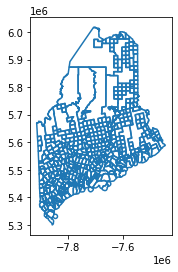

In [73]:
shapefiles_census.boundary.plot()

In [74]:
print(shapefiles_census.shape)
vest_shp.shape

(593, 24)


(609, 11)

<AxesSubplot:>

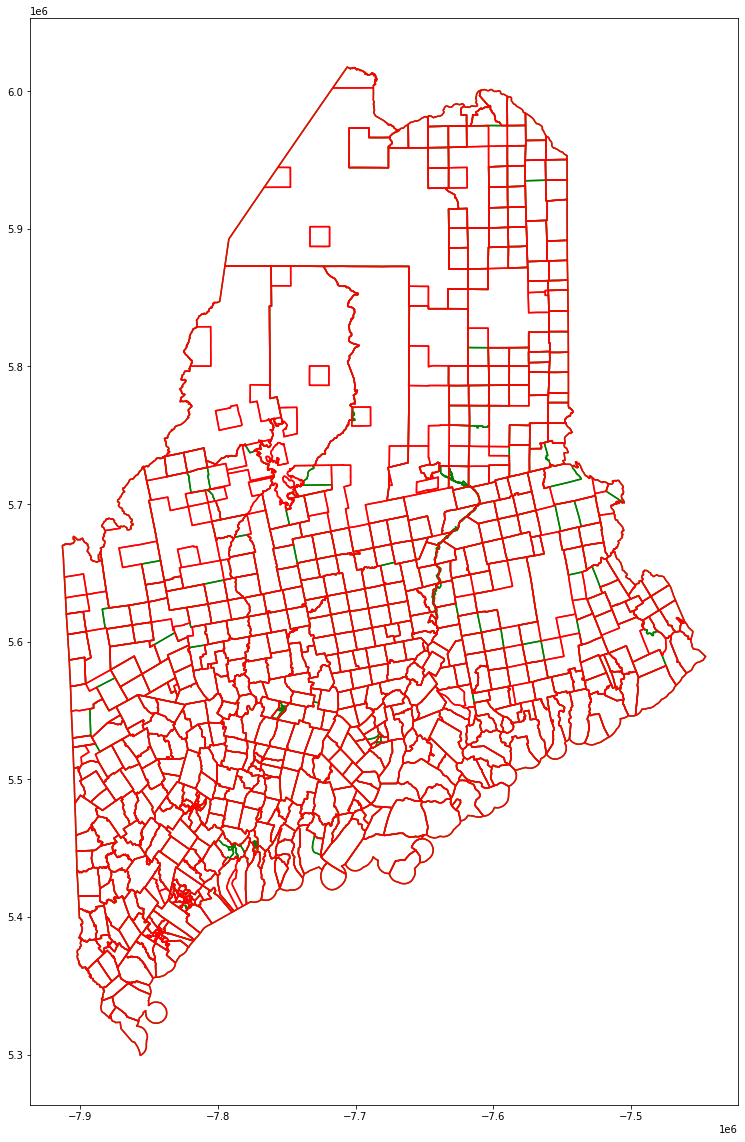

In [75]:
ax = shapefiles_census.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [76]:
shapefiles_census[shapefiles_census['NAMELSAD'].str.contains('Biddeford')]


,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,...,MTFCC,geometry,COUSUBFP,COUSUBNS,CLASSFP,EFF_DATE,AUTHTYPE,DOCU,FORM_ID,AREA
169,23,031,004860,Biddeford,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7855292.149 5387519.570 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
biddeford_shapefile = gp.read_file('./raw-from-source/Town_Info/Biddeford/2018_Ward/2018_Ward.shp')

In [78]:
biddeford_shapefile = biddeford_shapefile.to_crs(3857)

In [79]:
biddeford_shapefile['STATEFP'] = '23'
biddeford_shapefile['COUNTYFP'] = '031'
biddeford_shapefile.rename(columns={'Ward':'NAMELSAD'}, inplace=True)

In [80]:
biddeford_shapefile["NAMELSAD"].replace({'3':"Biddeford 3", '1':"Biddeford 1", '4':"Biddeford 4", '2':'Biddeford 2', '5':'Biddeford 5', '6':'Biddeford 6','7':'Biddeford 7'}, inplace=True)
biddeford_shapefile

,NAMELSAD,SHAPE_area,SHAPE_len,geometry,STATEFP,COUNTYFP
0,Biddeford 3,2.171580e+08,116037.876390,"MULTIPOLYGON (((-7840272.885 5383326.622, -784...",23,031
1,Biddeford 1,9.963425e+08,176902.747740,"POLYGON ((-7838003.728 5384639.934, -7837981.3...",23,031
2,Biddeford 4,1.864198e+07,40026.186315,"POLYGON ((-7843005.510 5386489.919, -7842989.4...",23,031
3,Biddeford 2,5.538994e+07,51690.234763,"POLYGON ((-7838003.728 5384639.934, -7838183.2...",23,031
4,Biddeford 5,1.440942e+07,33906.905158,"MULTIPOLYGON (((-7842344.315 5387331.629, -784...",23,031
5,Biddeford 6,2.118690e+08,121655.114619,"POLYGON ((-7843893.391 5388173.226, -7843924.3...",23,031
6,Biddeford 7,1.333307e+08,104525.940489,"POLYGON ((-7844230.598 5387106.815, -7844178.5...",23,031


In [81]:
biddeford_shapefile = biddeford_shapefile.drop(['SHAPE_area', 'SHAPE_len'], axis=1)

In [82]:
shapefiles_census = shapefiles_census.append(biddeford_shapefile, ignore_index = True)

In [83]:
shapefiles_census

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,...,MTFCC,geometry,COUSUBFP,COUSUBNS,CLASSFP,EFF_DATE,AUTHTYPE,DOCU,FORM_ID,AREA
0,23,001,019105,Durham,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7817369.025 5462128.237 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23,001,020601,Auburn Ward 1,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7825981.165 5491825.668 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,001,020602,Auburn Ward 2,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7826218.825 5482213.694 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,001,020603,Auburn Ward 3,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7827567.458 5480409.100 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,001,020604,Auburn Ward 4,A,00,None,None,None,None,...,G5240,"POLYGON Z ((-7827393.683 5471255.509 0.000, -7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,23,031,NaN,Biddeford 4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((-7843005.510 5386489.919, -7842989.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,23,031,NaN,Biddeford 2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((-7838003.728 5384639.934, -7838183.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,23,031,NaN,Biddeford 5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"MULTIPOLYGON (((-7842344.315 5387331.629, -784...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,23,031,NaN,Biddeford 6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"POLYGON ((-7843893.391 5388173.226, -7843924.3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#Add a join column to the source shapefile
shapefiles_census["join_col"]=shapefiles_census['COUNTYFP']+shapefiles_census['NAMELSAD']
shapefiles_census['join_col'] = shapefiles_census['join_col'].str.upper()
election_results['join_col'] = election_results['join_col'].str.upper()

In [85]:
join_attempt_one = pd.merge(shapefiles_census,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

left_only     427
right_only    412
both          173
Name: _merge, dtype: int64


In [86]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP','NAME','County_FIPS','Precinct','join_col']]

In [89]:
election_shape_dict = {'003ALLAGASH TOWN': '003ALLAGASH',
 '003AMITY TOWN': '003AMITY',
 '003ASHLAND TOWN': '003ASHLAND',
 '003BLAINE TOWN': '003BLAINE',
 '003BRIDGEWATER TOWN': '003BRIDGEWATER',
 '003CARIBOU CITY': '003CARIBOU/CONNOR',
 '003CARY PLANTATION': '003CARY',
 '003CASTLE HILL TOWN': '003CASTLE HILL',
 '003CASWELL TOWN': '003CASWELL',
 '003CHAPMAN TOWN': '003CHAPMAN',
 '003CRYSTAL TOWN': '003CRYSTAL',
 '003CYR PLANTATION': '003CYR',
 '003DYER BROOK TOWN': '003DYER BROOK',
 '003EAGLE LAKE TOWN': '003EAGLE LAKE',
 '003EASTON TOWN': '003EASTON',
 '003FORT FAIRFIELD TOWN': '003FORT FAIRFIELD',
 '003FORT KENT TOWN': '003FORT KENT',
 '003FRENCHVILLE TOWN': '003FRENCHVILLE',
 '003GARFIELD PLANTATION': '003GARFIELD',
 '003GLENWOOD PLANTATION': '003GLENWOOD',
 '003GRAND ISLE TOWN': '003GRAND ISLE',
 '003HAMLIN TOWN': '003HAMLIN',
 '003HAMMOND TOWN': '003HAMMOND',
 '003HAYNESVILLE TOWN': '003HAYNESVILLE',
 '003HERSEY TOWN': '003HERSEY',
 '003HODGDON TOWN': '003HODGDON',
 '003HOULTON TOWN': '003HOULTON',
 '003ISLAND FALLS TOWN': '003ISLAND FALLS',
 '003LIMESTONE TOWN': '003LIMESTONE',
 '003LINNEUS TOWN': '003LINNEUS',
 '003LITTLETON TOWN': '003LITTLETON',
 '003LUDLOW TOWN': '003LUDLOW',
 '003MACWAHOC PLANTATION': '003MACWAHOC',
 '003MADAWASKA TOWN': '003MADAWASKA',
 '003MAPLETON TOWN': '003MAPLETON',
 '003MARS HILL TOWN': '003MARS HILL',
 '003MASARDIS TOWN': '003MASARDIS',
 '003MERRILL TOWN': '003MERRILL',
 '003MONTICELLO TOWN': '003MONTICELLO',
 '003MORO PLANTATION': '003MORO/T7 R5',
 '003NASHVILLE PLANTATION': '003NASHVILLE',
 '003NEW CANADA TOWN': '003NEW CANADA',
 '003NEW LIMERICK TOWN': '003NEW LIMERICK',
 '003NEW SWEDEN TOWN': '003NEW SWEDEN',
 '003OAKFIELD TOWN': '003OAKFIELD',
 '003ORIENT TOWN': '003ORIENT',
 '003PERHAM TOWN': '003PERHAM',
 '003PORTAGE LAKE TOWN': '003PORTAGE LAKE',
 '003PRESQUE ISLE CITY': '003PRESQUE ISLE',
 '003REED PLANTATION': '003REED/UPPER MOLUNKUS',
 '003SHERMAN TOWN': '003SHERMAN/BENEDICTA/SILVER RIDGE',
 '003SMYRNA TOWN': '003SMYRNA',
 '003ST. AGATHA TOWN': '003ST. AGATHA/SINCLAIR',
 '003ST. FRANCIS TOWN': '003ST. FRANCIS',
 '003ST. JOHN PLANTATION': '003ST. JOHN',
 '003STOCKHOLM TOWN': '003STOCKHOLM',
 '003VAN BUREN TOWN': '003VAN BUREN',
 '003WADE TOWN': '003WADE',
 '003WALLAGRASS TOWN': '003WALLAGRASS',
 '003WASHBURN TOWN': '003WASHBURN',
 '003WESTFIELD TOWN': '003WESTFIELD',
 '003WESTMANLAND TOWN': '003WESTMANLAND',
 '003WESTON TOWN': '003WESTON/BANCROFT',
 '003WINTERVILLE PLANTATION': '003WINTERVILLE',
 '003WOODLAND TOWN': '003WOODLAND',
 '007AVON TOWN': '007AVON',
 '007CARRABASSETT VALLEY TOWN': '007CARRABASSETT VALLEY',
 '007CARTHAGE TOWN': '007CARTHAGE',
 '007CHESTERVILLE TOWN': '007CHESTERVILLE',
 '007COPLIN PLANTATION': '007COPLIN',
 '007DALLAS PLANTATION': '007DALLAS',
 '007EUSTIS TOWN': '007EUSTIS/ALDER STREAM/COBURN GORE/JIM POND',
 '007FARMINGTON TOWN': '007FARMINGTON',
 '007INDUSTRY TOWN': '007INDUSTRY',
 '007JAY TOWN': '007JAY',
 '007KINGFIELD TOWN': '007KINGFIELD/SALEM',
 '007NEW SHARON TOWN': '007NEW SHARON',
 '007NEW VINEYARD TOWN': '007NEW VINEYARD',
 '007PHILLIPS TOWN': '007PHILLIPS/MADRID',
 '007RANGELEY TOWN': '007RANGELEY/ADAMSTOWN/LOWER CUPSUPTIC',
 '007RANGELEY PLANTATION': '007RANGELEY PLT',
 '007SANDY RIVER PLANTATION': '007SANDY RIVER',
 '007STRONG TOWN': '007STRONG/FREEMAN',
 '007TEMPLE TOWN': '007TEMPLE',
 '007WELD TOWN': '007WELD',
 '007WILTON TOWN': '007WILTON',
 '007WYMAN UT': '007WYMAN',
 '009AMHERST TOWN': '009AMHERST',
 '009AURORA TOWN': '009AURORA/T28 MD',
 '009BAR HARBOR TOWN': '009BAR HARBOR',
 '009BLUE HILL TOWN': '009BLUE HILL',
 '009BROOKLIN TOWN': '009BROOKLIN',
 '009BROOKSVILLE TOWN': '009BROOKSVILLE',
 '009BUCKSPORT TOWN': '009BUCKSPORT',
 '009CASTINE TOWN': '009CASTINE',
 '009CRANBERRY ISLES TOWN': '009CRANBERRY ISLES',
 '009DEDHAM TOWN': '009DEDHAM',
 '009DEER ISLE TOWN': '009DEER ISLE',
 '009EASTBROOK TOWN': '009EASTBROOK',
 '009FRANKLIN TOWN': '009FRANKLIN',
 '009FRENCHBORO TOWN': '009FRENCHBORO',
 '009GOULDSBORO TOWN': '009GOULDSBORO',
 '009GREAT POND TOWN': '009GREAT POND/T32 MD',
 '009HANCOCK TOWN': '009HANCOCK',
 '009LAMOINE TOWN': '009LAMOINE',
 '009MARIAVILLE TOWN': '009MARIAVILLE',
 '009MOUNT DESERT TOWN': '009MOUNT DESERT',
 '009ORLAND TOWN': '009ORLAND',
 '009OSBORN TOWN': '009OSBORN',
 '009OTIS TOWN': '009OTIS',
 '009PENOBSCOT TOWN': '009PENOBSCOT',
 '009SEDGWICK TOWN': '009SEDGWICK',
 '009SORRENTO TOWN': '009SORRENTO',
 '009SOUTHWEST HARBOR TOWN': '009SOUTHWEST HARBOR',
 '009STONINGTON TOWN': '009STONINGTON',
 '009SULLIVAN TOWN': '009SULLIVAN',
 '009SURRY TOWN': '009SURRY',
 '009SWANS ISLAND TOWN': '009SWANS ISLAND',
 '009TREMONT TOWN': '009TREMONT',
 '009TRENTON TOWN': '009TRENTON',
 '009VERONA ISLAND TOWN': '009VERONA ISLAND',
 '009WALTHAM TOWN': '009WALTHAM',
 '009WINTER HARBOR TOWN': '009WINTER HARBOR',
 '013APPLETON TOWN': '013APPLETON',
 '013CAMDEN TOWN': '013CAMDEN',
 '013CRIEHAVEN UT': '013CRIEHAVEN',
 '013CUSHING TOWN': '013CUSHING',
 '013FRIENDSHIP TOWN': '013FRIENDSHIP',
 '013HOPE TOWN': '013HOPE',
 '013ISLE AU HAUT TOWN': '013ISLE AU HAUT',
 '013MATINICUS ISLE PLANTATION': '013MATINICUS ISLE',
 '013NORTH HAVEN TOWN': '013NORTH HAVEN',
 '013OWLS HEAD TOWN': '013OWLS HEAD',
 '013ROCKLAND CITY': '013ROCKLAND',
 '013ROCKPORT TOWN': '013ROCKPORT',
 '013SOUTH THOMASTON TOWN': '013SOUTH THOMASTON',
 '013ST. GEORGE TOWN': '013ST. GEORGE',
 '013THOMASTON TOWN': '013THOMASTON',
 '013UNION TOWN': '013UNION',
 '013VINALHAVEN TOWN': '013VINALHAVEN',
 '013WARREN TOWN': '013WARREN',
 '013WASHINGTON TOWN': '013WASHINGTON',
 '015ALNA TOWN': '015ALNA',
 '015BOOTHBAY TOWN': '015BOOTHBAY',
 '015BOOTHBAY HARBOR TOWN': '015BOOTHBAY HARBOR',
 '015BREMEN TOWN': '015BREMEN',
 '015BRISTOL TOWN': '015BRISTOL/LOUDS ISLAND',
 '015DAMARISCOTTA TOWN': '015DAMARISCOTTA',
 '015DRESDEN TOWN': '015DRESDEN',
 '015EDGECOMB TOWN': '015EDGECOMB',
 '015JEFFERSON TOWN': '015JEFFERSON',
 '015MONHEGAN PLANTATION': '015MONHEGAN',
 '015NEWCASTLE TOWN': '015NEWCASTLE',
 '015NOBLEBORO TOWN': '015NOBLEBORO',
 '015SOMERVILLE TOWN': '015SOMERVILLE',
 '015SOUTH BRISTOL TOWN': '015SOUTH BRISTOL',
 '015SOUTHPORT TOWN': '015SOUTHPORT',
 '015WALDOBORO TOWN': '015WALDOBORO',
 '015WESTPORT ISLAND TOWN': '015WESTPORT ISLAND',
 '015WHITEFIELD TOWN': '015WHITEFIELD',
 '015WISCASSET TOWN': '015WISCASSET',
 '017ANDOVER TOWN': '017ANDOVER/ANDOVER NORTH SURPLUS',
 '017BETHEL TOWN': '017BETHEL/MASON',
 '017BROWNFIELD TOWN': '017BROWNFIELD',
 '017BUCKFIELD TOWN': '017BUCKFIELD',
 '017BYRON TOWN': '017BYRON',
 '017CANTON TOWN': '017CANTON',
 '017DENMARK TOWN': '017DENMARK',
 '017DIXFIELD TOWN': '017DIXFIELD',
 '017FRYEBURG TOWN': '017FRYEBURG',
 '017GILEAD TOWN': '017GILEAD',
 '017GREENWOOD TOWN': '017GREENWOOD',
 '017HANOVER TOWN': '017HANOVER',
 '017HARTFORD TOWN': '017HARTFORD',
 '017HEBRON TOWN': '017HEBRON',
 '017HIRAM TOWN': '017HIRAM',
 '017LINCOLN PLANTATION': '017LINCOLN/LYNCHTOWN',
 '017LOVELL TOWN': '017LOVELL',
 '017MAGALLOWAY PLANTATION': '017MAGALLOWAY',
 '017MEXICO TOWN': '017MEXICO',
 '017MILTON UT': '017MILTON',
 '017NEWRY TOWN': '017NEWRY/RILEY',
 '017NORWAY TOWN': '017NORWAY',
 '017OTISFIELD TOWN': '017OTISFIELD',
 '017OXFORD TOWN': '017OXFORD',
 '017PARIS TOWN': '017PARIS',
 '017PERU TOWN': '017PERU',
 '017PORTER TOWN': '017PORTER',
 '017ROXBURY TOWN': '017ROXBURY',
 '017RUMFORD TOWN': '017RUMFORD',
 '017STONEHAM TOWN': '017STONEHAM',
 '017STOW TOWN': '017STOW',
 '017SUMNER TOWN': '017SUMNER',
 '017SWEDEN TOWN': '017SWEDEN',
 '017UPTON TOWN': '017UPTON',
 '017WATERFORD TOWN': '017WATERFORD',
 '017WEST PARIS TOWN': '017WEST PARIS',
 '017WOODSTOCK TOWN': '017WOODSTOCK',
 '019ALTON TOWN': '019ALTON',
 '019ARGYLE UT': '019ARGYLE',
 '019BANGOR CITY': '019BANGOR',
 '019BRADFORD TOWN': '019BRADFORD',
 '019BRADLEY TOWN': '019BRADLEY',
 '019BREWER CITY': '019BREWER',
 '019BURLINGTON TOWN': '019BURLINGTON',
 '019CARMEL TOWN': '019CARMEL',
 '019CARROLL PLANTATION': '019CARROLL',
 '019CHARLESTON TOWN': '019CHARLESTON',
 '019CHESTER TOWN': '019CHESTER',
 '019CLIFTON TOWN': '019CLIFTON',
 '019CORINNA TOWN': '019CORINNA',
 '019CORINTH TOWN': '019CORINTH',
 '019DEXTER TOWN': '019DEXTER',
 '019DIXMONT TOWN': '019DIXMONT',
 '019DREW PLANTATION': '019DREW',
 '019EAST MILLINOCKET TOWN': '019EAST MILLINOCKET/DOLBY',
 '019EDDINGTON TOWN': '019EDDINGTON',
 '019EDINBURG TOWN': '019EDINBURG',
 '019ENFIELD TOWN': '019ENFIELD',
 '019ETNA TOWN': '019ETNA',
 '019EXETER TOWN': '019EXETER',
 '019GARLAND TOWN': '019GARLAND',
 '019GLENBURN TOWN': '019GLENBURN',
 '019GREENBUSH TOWN': '019GREENBUSH',
 '019HAMPDEN TOWN': '019HAMPDEN',
 '019HERMON TOWN': '019HERMON',
 '019HOLDEN TOWN': '019HOLDEN',
 '019HOWLAND TOWN': '019HOWLAND',
 '019HUDSON TOWN': '019HUDSON',
 '019KENDUSKEAG TOWN': '019KENDUSKEAG',
 '019KINGMAN UT': '019KINGMAN',
 '019LAGRANGE TOWN': '019LAGRANGE',
 '019LAKEVILLE TOWN': '019LAKEVILLE',
 '019LEE TOWN': '019LEE',
 '019LEVANT TOWN': '019LEVANT',
 '019LINCOLN TOWN': '019LINCOLN',
 '019LOWELL TOWN': '019LOWELL',
 '019MATTAWAMKEAG TOWN': '019MATTAWAMKEAG',
 '019MAXFIELD TOWN': '019MAXFIELD',
 '019MEDWAY TOWN': '019MEDWAY',
 '019MILFORD TOWN': '019MILFORD/GREENFIELD',
 '019MILLINOCKET TOWN': '019MILLINOCKET',
 '019MOUNT CHASE TOWN': '019MOUNT CHASE',
 '019NEWBURGH TOWN': '019NEWBURGH',
 '019NEWPORT TOWN': '019NEWPORT',
 '019ORONO TOWN': '019ORONO',
 '019ORRINGTON TOWN': '019ORRINGTON',
 '019PASSADUMKEAG TOWN': '019PASSADUMKEAG',
 '019PATTEN TOWN': '019PATTEN',
 '019PENOBSCOT INDIAN ISLAND RESERVATION': '019PENOBSCOT NATION VOTING DISTRICT',
 '019PLYMOUTH TOWN': '019PLYMOUTH',
 '019PRENTISS UT': '019PRENTISS',
 '019SEBOEIS PLANTATION': '019SEBOEIS',
 '019SPRINGFIELD TOWN': '019SPRINGFIELD',
 '019STACYVILLE TOWN': '019STACYVILLE',
 '019STETSON TOWN': '019STETSON',
 '019VEAZIE TOWN': '019VEAZIE',
 '019WEBSTER PLANTATION': '019WEBSTER',
 '019WINN TOWN': '019WINN',
 '019WOODVILLE TOWN': '019WOODVILLE',
 '021ABBOT TOWN': '021ABBOT',
 '021ATKINSON TOWN': '021ATKINSON',
 '021BEAVER COVE TOWN': '021BEAVER COVE/FRENCHTOWN/LILY BAY',
 '021BOWERBANK TOWN': '021BOWERBANK',
 '021BROWNVILLE TOWN': '021BROWNVILLE',
 '021DOVER-FOXCROFT TOWN': '021DOVER-FOXCROFT',
 '021GREENVILLE TOWN': '021GREENVILLE/UNORGANIZED TWPS',
 '021GUILFORD TOWN': '021GUILFORD',
 '021KINGSBURY PLANTATION': '021KINGSBURY',
 '021LAKE VIEW PLANTATION': '021LAKE VIEW',
 '021MEDFORD TOWN': '021MEDFORD',
 '021MILO TOWN': '021MILO/ORNEVILLE',
 '021MONSON TOWN': '021MONSON/BLANCHARD',
 '021PARKMAN TOWN': '021PARKMAN',
 '021SANGERVILLE TOWN': '021SANGERVILLE',
 '021SEBEC TOWN': '021SEBEC',
 '021SHIRLEY TOWN': '021SHIRLEY',
 '021WELLINGTON TOWN': '021WELLINGTON',
 '021WILLIMANTIC TOWN': '021WILLIMANTIC',
 '025ANSON TOWN': '025ANSON',
 '025ATHENS TOWN': '025ATHENS',
 '025BINGHAM TOWN': '025BINGHAM',
 '025BRIGHTON PLANTATION': '025BRIGHTON',
 '025CAMBRIDGE TOWN': '025CAMBRIDGE',
 '025CANAAN TOWN': '025CANAAN',
 '025CARATUNK TOWN': '025CARATUNK',
 '025CORNVILLE TOWN': '025CORNVILLE',
 '025DENNISTOWN PLANTATION': '025DENNISTOWN',
 '025DETROIT TOWN': '025DETROIT',
 '025EMBDEN TOWN': '025EMBDEN',
 '025FAIRFIELD TOWN': '025FAIRFIELD',
 '025HARMONY TOWN': '025HARMONY',
 '025HARTLAND TOWN': '025HARTLAND',
 '025HIGHLAND PLANTATION': '025HIGHLAND PLT/CARRYING PLACE/DEAD RIVER',
 '025JACKMAN TOWN': '025JACKMAN/ATTEAN/BIG 6/HOLEB/LONG POND/PARLIN POND/RAYTOWN/T7 R19/UPPER ENCHANTED',
 '025MADISON TOWN': '025MADISON',
 '025MERCER TOWN': '025MERCER',
 '025MOOSE RIVER TOWN': '025MOOSE RIVER',
 '025MOSCOW TOWN': '025MOSCOW/BOWTOWN',
 '025NEW PORTLAND TOWN': '025NEW PORTLAND',
 '025NORRIDGEWOCK TOWN': '025NORRIDGEWOCK',
 '025PALMYRA TOWN': '025PALMYRA',
 '025PITTSFIELD TOWN': '025PITTSFIELD',
 '025PLEASANT RIDGE PLANTATION': '025PLEASANT RIDGE',
 '025RIPLEY TOWN': '025RIPLEY',
 '025SEBOOMOOK LAKE UT': '025ROCKWOOD STRIP/ELM STREAM/PITTSTON/SANDBAR TRACT/SAPLING/SEBOOMOOK/TAUNTON & RAYNHAM/TOMHEGAN',
 '025SKOWHEGAN TOWN': '025SKOWHEGAN',
 '025SMITHFIELD TOWN': '025SMITHFIELD',
 '025SOLON TOWN': '025SOLON',
 '025ST. ALBANS TOWN': '025ST. ALBANS',
 '025STARKS TOWN': '025STARKS',
 '025THE FORKS PLANTATION': '025THE FORKS/INDIAN STREAM/MOXIE GORE',
 '025WEST FORKS PLANTATION': '025WEST FORKS',
 '029ADDISON TOWN': '029ADDISON',
 '029ALEXANDER TOWN': '029ALEXANDER',
 '029BAILEYVILLE TOWN': '029BAILEYVILLE',
 '029BARING PLANTATION': '029BARING',
 '029BEALS TOWN': '029BEALS',
 '029BEDDINGTON TOWN': '029BEDDINGTON/DEVEREAUX/T24 MD',
 '029CALAIS CITY': '029CALAIS',
 '029CHARLOTTE TOWN': '029CHARLOTTE',
 '029CHERRYFIELD TOWN': '029CHERRYFIELD',
 '029COLUMBIA TOWN': '029COLUMBIA',
 '029COLUMBIA FALLS TOWN': '029COLUMBIA FALLS',
 '029COOPER TOWN': '029COOPER',
 '029CRAWFORD TOWN': '029CRAWFORD',
 '029CUTLER TOWN': '029CUTLER',
 '029DANFORTH TOWN': '029DANFORTH/BROOKTON/FOREST',
 '029DEBLOIS TOWN': '029DEBLOIS',
 '029DENNYSVILLE TOWN': '029DENNYSVILLE/EDMUNDS',
 '029EAST MACHIAS TOWN': '029EAST MACHIAS',
 '029EASTPORT CITY': '029EASTPORT',
 '029GRAND LAKE STREAM PLANTATION': '029GRAND LAKE STREAM PLT',
 '029HARRINGTON TOWN': '029HARRINGTON',
 '029JONESBORO TOWN': '029JONESBORO',
 '029JONESPORT TOWN': '029JONESPORT',
 '029LUBEC TOWN': '029LUBEC',
 '029MACHIAS TOWN': '029MACHIAS',
 '029MACHIASPORT TOWN': '029MACHIASPORT',
 '029MARSHFIELD TOWN': '029MARSHFIELD',
 '029MEDDYBEMPS TOWN': '029MEDDYBEMPS',
 '029MILBRIDGE TOWN': '029MILBRIDGE',
 '029NORTHFIELD TOWN': '029NORTHFIELD',
 '029PASSAMAQUODDY INDIAN TOWNSHIP RESERVATION': '029PASSAMAQUODDY INDIAN TOWNSHIP',
 '029PASSAMAQUODDY PLEASANT POINT RESERVATION': '029PLEASANT POINT VOTING DISTRICT',
 '029PEMBROKE TOWN': '029PEMBROKE',
 '029PERRY TOWN': '029PERRY',
 '029PRINCETON TOWN': '029PRINCETON/BIG LAKE',
 '029ROBBINSTON TOWN': '029ROBBINSTON',
 '029ROQUE BLUFFS TOWN': '029ROQUE BLUFFS',
 '029STEUBEN TOWN': '029STEUBEN',
 '029TALMADGE TOWN': '029TALMADGE',
 '029TOPSFIELD TOWN': '029TOPSFIELD/CODYVILLE/KOSSUTH',
 '029VANCEBORO TOWN': '029VANCEBORO/LAMBERT LAKE',
 '029WAITE TOWN': '029WAITE',
 '029WESLEY TOWN': '029WESLEY/DAY BLOCK',
 '029WHITING TOWN': '029WHITING/TRESCOTT',
 '029WHITNEYVILLE TOWN': '029WHITNEYVILLE'}

shapefiles_census["join_col"]=shapefiles_census["join_col"].map(election_shape_dict).fillna(shapefiles_census["join_col"])

In [90]:
join_attempt_two = pd.merge(shapefiles_census,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          531
left_only      69
right_only     54
Name: _merge, dtype: int64


In [91]:
join_attempt_two[join_attempt_two['_merge'] != 'both'][['COUNTYFP','NAME','County_FIPS','Precinct','join_col']]

,COUNTYFP,NAME,County_FIPS,Precinct,join_col
28,005,Gorham,NaN,NaN,005GORHAM
35,005,Harpswell,NaN,NaN,005HARPSWELL
37,005,Brunswick Voting District 1,NaN,NaN,005BRUNSWICK VOTING DISTRICT 1
38,005,Brunswick Voting District 5,NaN,NaN,005BRUNSWICK VOTING DISTRICT 5
39,005,Brunswick Voting District 6,NaN,NaN,005BRUNSWICK VOTING DISTRICT 6
...,...,...,...,...,...
649,NaN,NaN,005,Gorham 2,005GORHAM 2
650,NaN,NaN,005,Harpswell - Mainland,005HARPSWELL - MAINLAND
651,NaN,NaN,005,Harpswell - Great Island,005HARPSWELL - GREAT ISLAND
652,NaN,NaN,005,Harpswell - Orr's/Bailey,005HARPSWELL - ORR'S/BAILEY


In [92]:
shapefiles_census_comp=join_attempt_two
del shapefiles_census_comp['_merge']
shapefiles_census_comp = gp.GeoDataFrame(shapefiles_census_comp,crs=3857)

In [95]:
join_attempt_shape1 = pd.merge(shapefiles_census_comp,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_shape1["_merge"].value_counts())
join_attempt_shape1.columns

both          583
left_only      71
right_only     26
Name: _merge, dtype: int64


Index(['STATEFP_x', 'COUNTYFP_x', 'VTDST', 'NAMELSAD', 'VTDI', 'LSAD',
       'CHNG_TYPE', 'ORIG_NAME', 'ORIG_CODE', 'RELATE', 'NAME_x', 'VINTAGE',
       'FUNCSTAT', 'JUSTIFY', 'MTFCC', 'geometry_x', 'COUSUBFP', 'COUSUBNS',
       'CLASSFP', 'EFF_DATE', 'AUTHTYPE', 'DOCU', 'FORM_ID', 'AREA',
       'join_col', 'County', 'Precinct', 'County_FIPS_x', 'G16PREDCLI_x',
       'G16PRERTRU_x', 'G16PRELJOH_x', 'G16PREGSTE_x', 'G16PREOWRI_x',
       'STATEFP_y', 'COUNTYFP_y', 'NAME_y', 'G16PREDCLI_y', 'G16PRERTRU_y',
       'G16PRELJOH_y', 'G16PREGSTE_y', 'G16PREOWRI_y', 'geometry_y',
       'County_FIPS_y', '_merge'],
      dtype='object')

In [96]:
print(shapefiles_census_comp[shapefiles_census_comp['join_col'].str.contains('WATERVILLE')])

    STATEFP COUNTYFP   VTDST           NAMELSAD VTDI LSAD CHNG_TYPE ORIG_NAME  \
108      23      011  807402  Waterville Ward 2    A   00      None      None   
109      23      011  807404  Waterville Ward 4    A   00      None      None   
110      23      011  807405  Waterville Ward 5    A   00      None      None   
111      23      011  807406  Waterville Ward 6    A   00      None      None   
112      23      011  807407  Waterville Ward 7    A   00      None      None   
113      23      011  807401  Waterville Ward 1    A   00      None      None   
114      23      011  807403  Waterville Ward 3    A   00      None      None   
621     NaN      NaN     NaN                NaN  NaN  NaN       NaN       NaN   

    ORIG_CODE RELATE  ... AREA              join_col    County    Precinct  \
108      None   None  ...  NaN  011WATERVILLE WARD 2       NaN         NaN   
109      None   None  ...  NaN  011WATERVILLE WARD 4       NaN         NaN   
110      None   None  ...  NaN  011W

<AxesSubplot:>

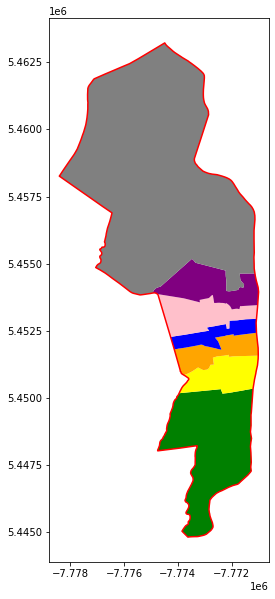

In [97]:
ax = vest_shp[vest_shp['join_col'] == '023BATH 1-7'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 2'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 3'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 4'].plot(figsize=(10,10),ax=ax,color="blue")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 5'].plot(figsize=(10,10),ax=ax,color="pink")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 6'].plot(figsize=(10,10),ax=ax,color="purple")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '023BATH WARD 7'].plot(figsize=(10,10),ax=ax,color="gray")

In [98]:
#Merge Bath precincts according to VEST document
#VEST-VTDs were merged for Bath, Brunswick, Waterville as statewide votes are not reported by ward.
prec2combine = [shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 1'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 2'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 3'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 4'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 5'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 6'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '023BATH WARD 7']]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="023BATH WARD 1","join_col"]='023BATH 1-7'
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="023BATH 1-7","geometry"]=new_fort.unary_union
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 2"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 3"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 4"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 5"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 6"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="023BATH WARD 7"]

<ipython-input-98-8c42a57e71c3>:4: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)


<AxesSubplot:>

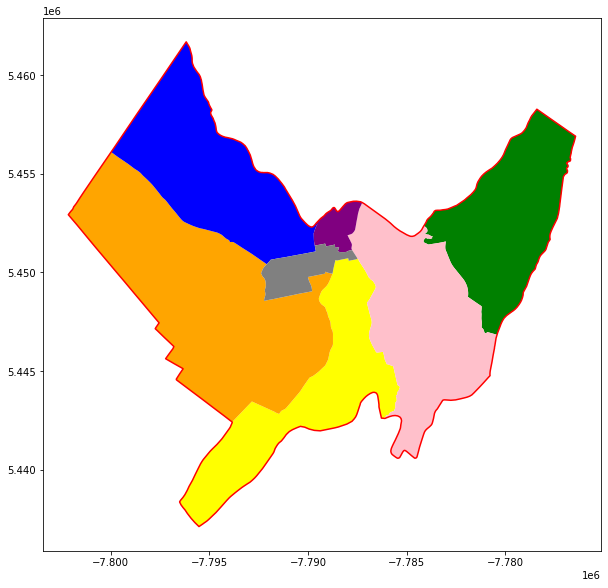

In [99]:
ax = vest_shp[vest_shp['join_col'] == '005BRUNSWICK 1-7'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 2'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 3'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 4'].plot(figsize=(10,10),ax=ax,color="blue")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 5'].plot(figsize=(10,10),ax=ax,color="pink")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 6'].plot(figsize=(10,10),ax=ax,color="purple")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 7'].plot(figsize=(10,10),ax=ax,color="gray")

In [100]:
#Merge Brunswick precincts according to VEST document
#VEST-VTDs were merged for Bath, Brunswick, Waterville as statewide votes are not reported by ward.
prec2combine = [shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 1'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 2'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 3'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 4'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 5'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 6'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '005BRUNSWICK VOTING DISTRICT 7']]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="005BRUNSWICK VOTING DISTRICT 1","join_col"]='005BRUNSWICK 1-7'
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="005BRUNSWICK 1-7","geometry"]=new_fort.unary_union
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 2"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 3"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 4"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 5"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 6"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="005BRUNSWICK VOTING DISTRICT 7"]

<ipython-input-100-e8b1066327ca>:4: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)


<AxesSubplot:>

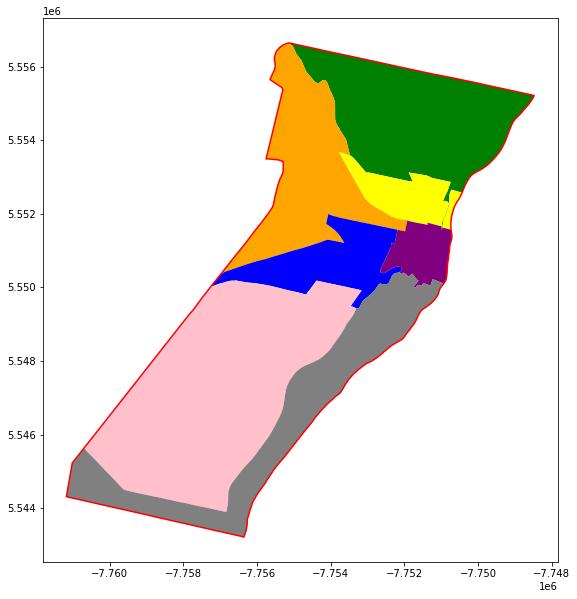

In [101]:
ax = vest_shp[vest_shp['join_col'] == '011WATERVILLE 1-7'].boundary.plot(figsize=(10,10),color="red")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 1'].plot(figsize=(10,10),ax=ax,color="green")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 2'].plot(figsize=(10,10),ax=ax,color="yellow")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 3'].plot(figsize=(10,10),ax=ax,color="orange")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 4'].plot(figsize=(10,10),ax=ax,color="blue")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 5'].plot(figsize=(10,10),ax=ax,color="pink")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 6'].plot(figsize=(10,10),ax=ax,color="purple")
shapefiles_census_comp[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 7'].plot(figsize=(10,10),ax=ax,color="gray")

In [102]:
#Merge Bath precincts according to VEST document
#VEST-VTDs were merged for Bath, Brunswick, Waterville as statewide votes are not reported by ward.
prec2combine = [shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 1'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 2'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 3'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 4'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 5'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 6'],shapefiles_census_comp.loc[shapefiles_census_comp['join_col'] == '011WATERVILLE WARD 7']]
new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="011WATERVILLE WARD 1","join_col"]='011WATERVILLE 1-7'
shapefiles_census_comp.loc[shapefiles_census_comp["join_col"]=="011WATERVILLE 1-7","geometry"]=new_fort.unary_union
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 2"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 3"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 4"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 5"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 6"]
shapefiles_census_comp = shapefiles_census_comp[shapefiles_census_comp["join_col"]!="011WATERVILLE WARD 7"]

<ipython-input-102-73823fbea517>:4: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  new_fort = gp.GeoDataFrame(pd.concat(prec2combine, ignore_index=True), crs = 32100)


In [103]:
final_merge = pd.merge(shapefiles_census_comp,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

both          586
left_only      50
right_only     26
Name: final_merge, dtype: int64

In [104]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     394
False    192
dtype: int64


1) For 003-Caribou city difference in area is 21.94590484685952
2) For 003-Moro plantation difference in area is 20.79648326502876
3) For 003-Reed plantation difference in area is 9.710330523982027
4) For 003-St. Agatha town difference in area is 20.408672251176597
5) For 003-Sherman town difference in area is 21.003460456886156
6) For 003-Weston town difference in area is 21.762137636480205
7) For 007-Eustis town difference in area is 47.050887099966424
8) For 007-Kingfield town difference in area is 12.026792627351258
9) For 007-Phillips town difference in area is 21.5515656550383
10) For 007-Rangeley town difference in area is 37.43406237837343
11) For 007-Strong town difference in area is 17.555412521618955
12) For 009-Aurora town difference in area is 19.05263922602109
13) For 009-Great Pond town difference in area is 21.182691232111996
14) For 015-Bristol town difference in area is 7.476537710802063
15) For 017-Andover town difference in area is 13.232842060802756
16) For 017-Bet

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\geopandas\plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


23) For 019-Greenbush town difference in area is 1.610134039399951
24) For 019-Lincoln town difference in area is 0.7770219798995571
25) For 019-Medway town difference in area is 1.2230460646014185
26) For 019-Milford town difference in area is 19.777509152259935
27) For 021-Beaver Cove town difference in area is 38.337678778125515
28) For 021-Greenville town difference in area is 180.55843856062276
29) For 021-Milo town difference in area is 19.903211347199218
30) For 021-Monson town difference in area is 23.591828534090904
31) For 025-Highland plantation difference in area is 44.64539308611185
32) For 025-Jackman town difference in area is 157.83093158177863
33) For 025-Moscow town difference in area is 14.65524720848073
34) For 025-Seboomook Lake UT difference in area is 750.8297657949652
35) For 025-The Forks plantation difference in area is 19.959822294401906
36) For 029-Beddington town difference in area is 40.107156049351815
37) For 029-Danforth town difference in area is 48.721

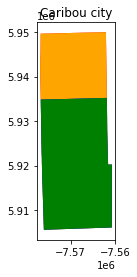

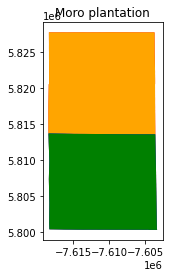

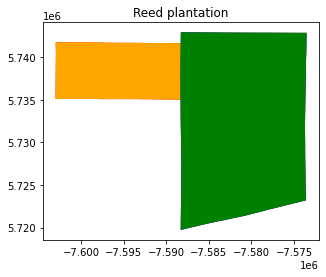

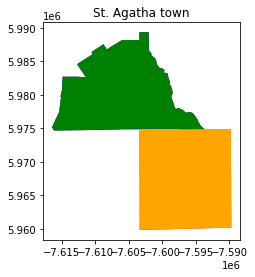

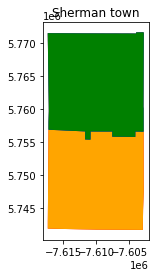

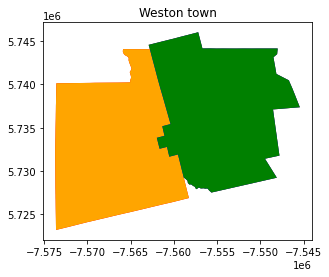

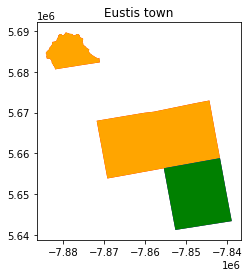

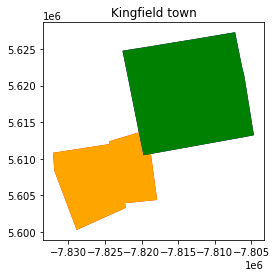

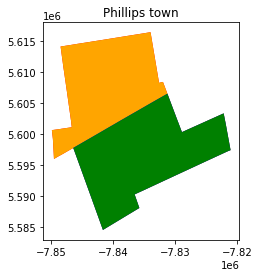

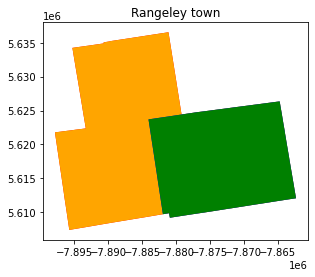

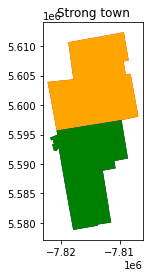

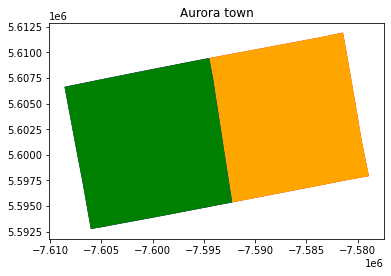

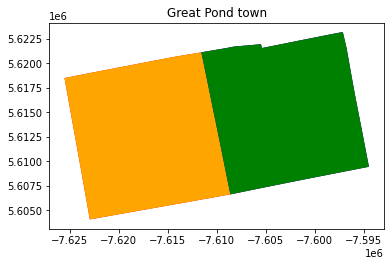

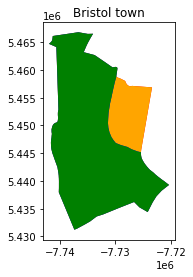

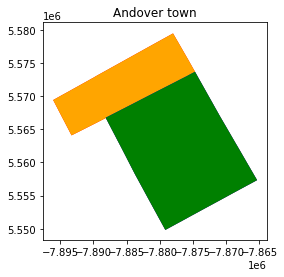

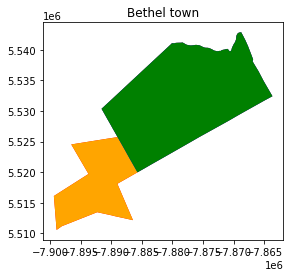

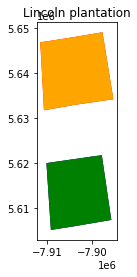

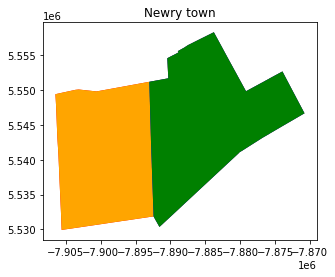

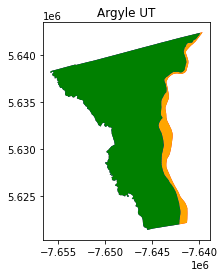

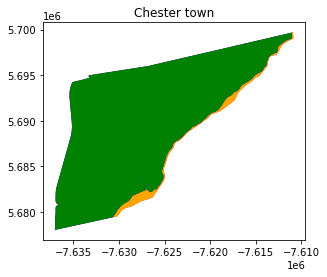

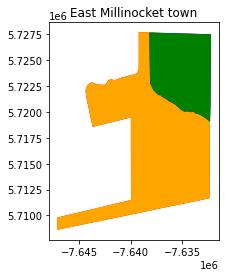

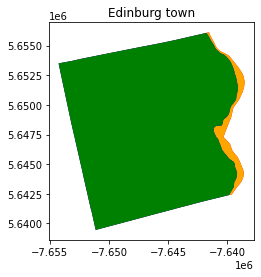

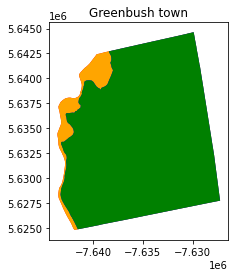

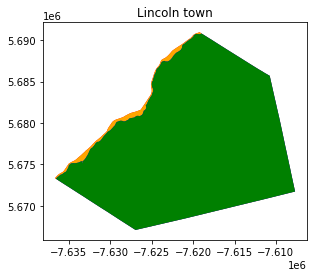

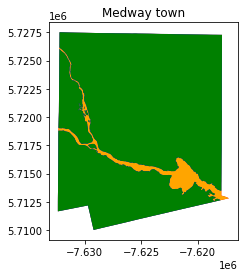

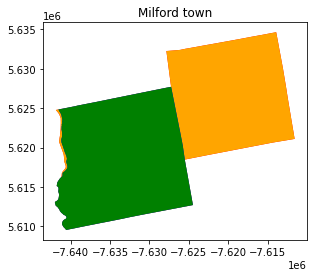

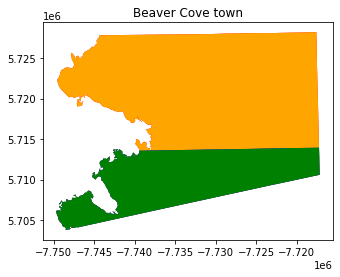

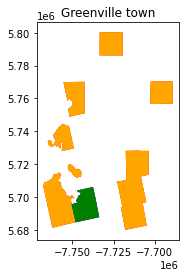

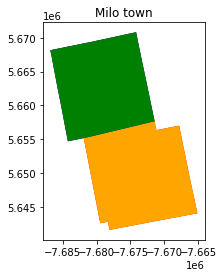

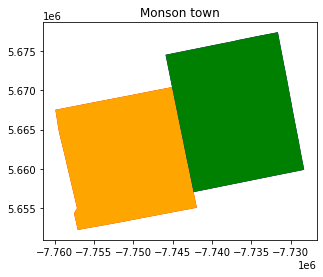

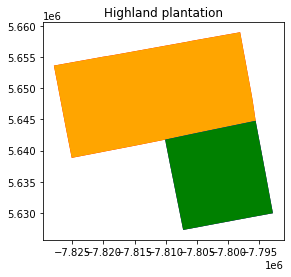

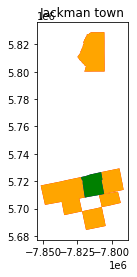

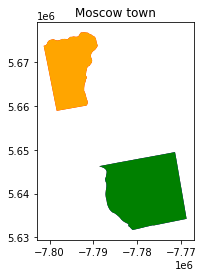

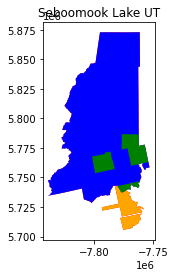

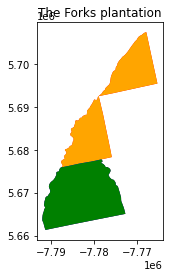

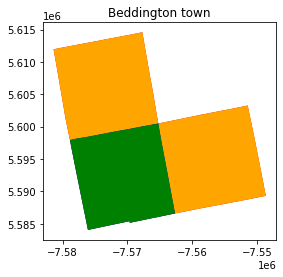

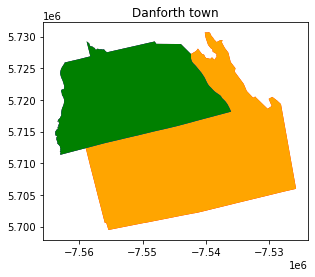

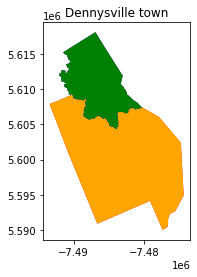

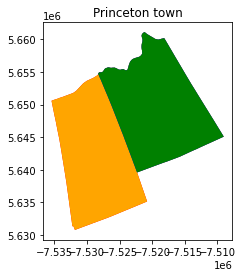

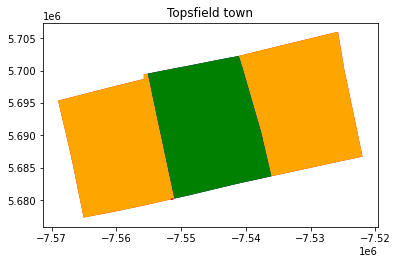

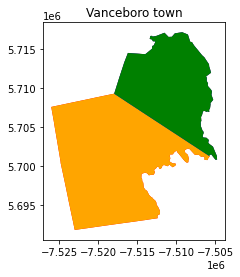

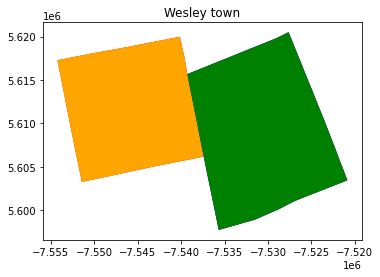

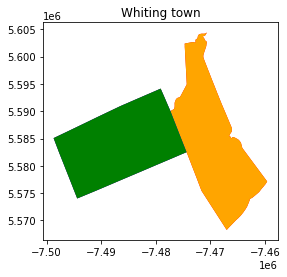

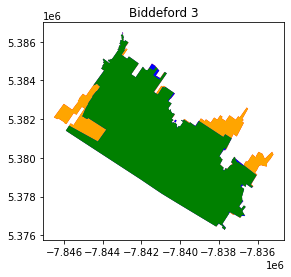

In [105]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [106]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(586, 1)
402 precincts w/ a difference of 0 km^2
82 precincts w/ a difference between 0 and 0.1 km^2
8 precincts w/ a difference between 0.1 and 0.5 km^2
4 precincts w/ a difference between 0.5 and 1 km^2
3 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
37 precincts w/ a difference greater than 5 km^2


In [107]:
# Dissolve on county to get a full county map
counties_source = shapefiles_census_comp.dissolve('COUNTYFP')
counties_vest = vest_shp.dissolve('County_FIPS')

<AxesSubplot:>

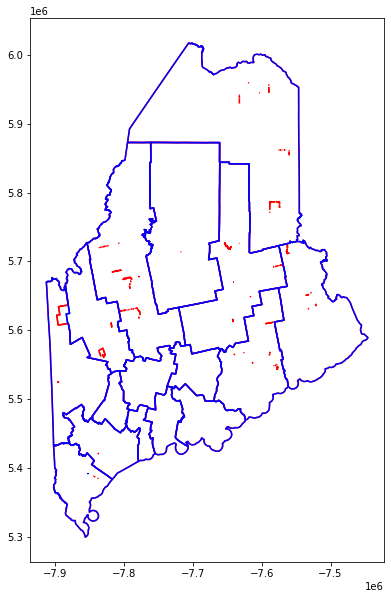

In [108]:
ax = counties_vest.boundary.plot(figsize=(10,10),color='red')
counties_source.boundary.plot(ax=ax,color='blue')

## Summary of towns that were examined more closely  
  
Towns where VEST appeared to match precinct maps:    
-Gorham  
  
Towns where VEST did not appear to match precinct maps:  
-Ellsworth  
  
Towns where we could not find a precinct map:  
-Harpswell  

## Ellsworth Precincts
VEST-VTDs for Biddeford, Ellsworth, Gorham, Harpswell were sourced from township ward maps.

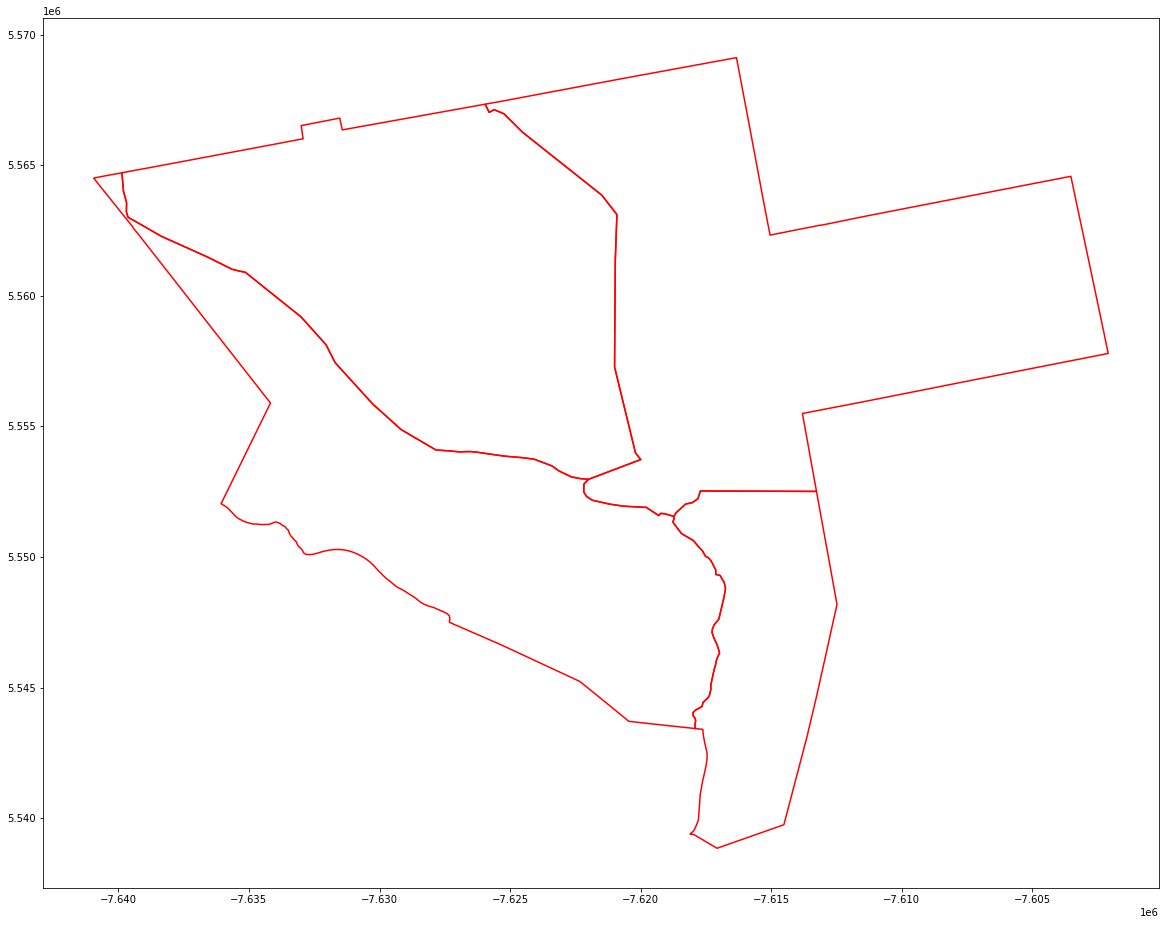

In [109]:
ax = vest_shp[vest_shp['NAME'].str.contains('Ellsworth')].boundary.plot(figsize=(20,20),color="red")

### VEST's map does not appear to match Ellsworth precinct map. Precinct names appear to match.

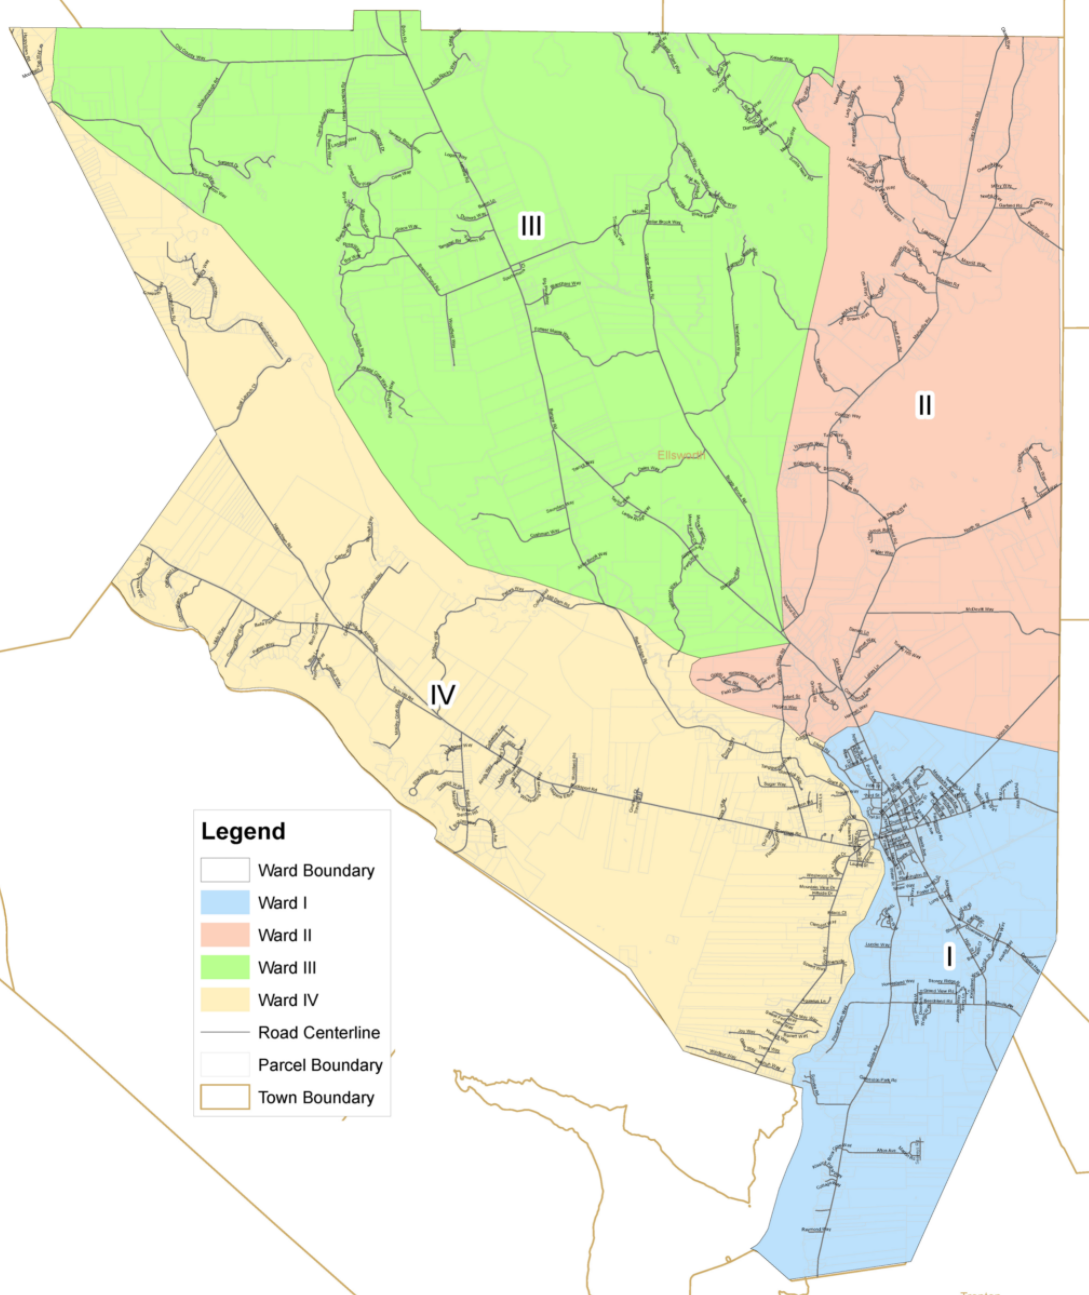

source-https://www.ellsworthmaine.gov/wp-content/uploads/2016/06/Detailed-Ellsworth-Election-Ward-Map-as-of-October-2020.pdf

## Gorham Precincts
VEST-VTDs for Biddeford, Ellsworth, Gorham, Harpswell were sourced from township ward maps.

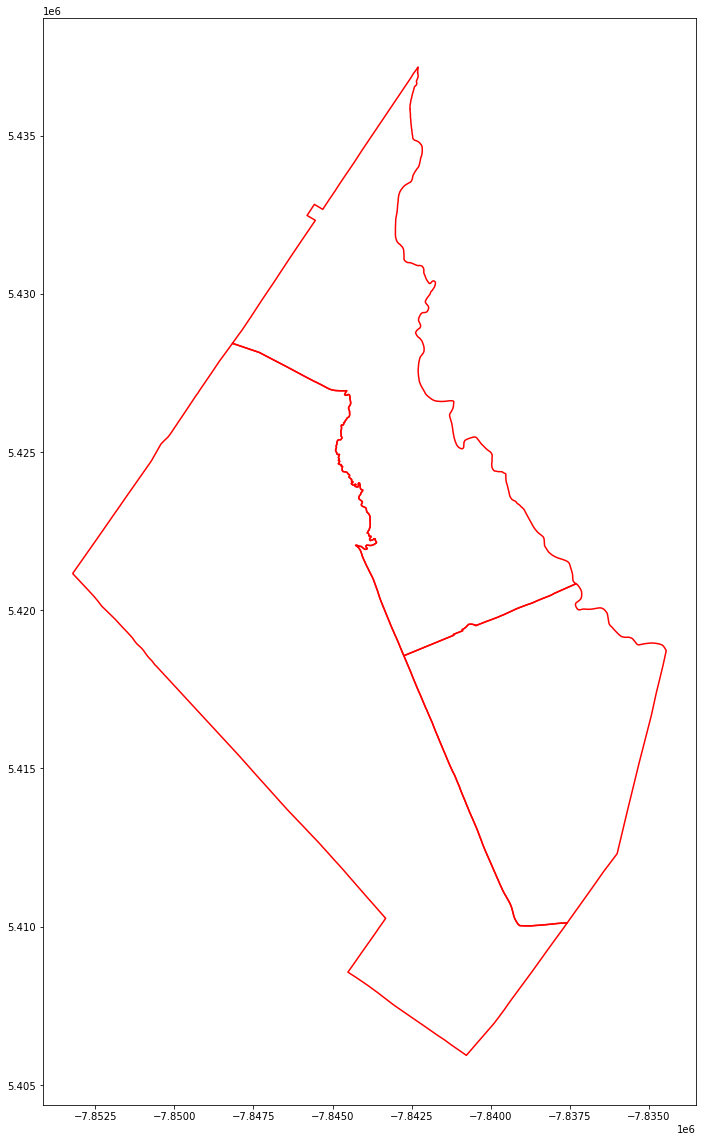

In [110]:
ax = vest_shp[vest_shp['NAME'].str.contains('Gorham')].boundary.plot(figsize=(20,20),color="red")

### VEST's map appears to match the Gorham precinct map. Precinct Names also appear to match.

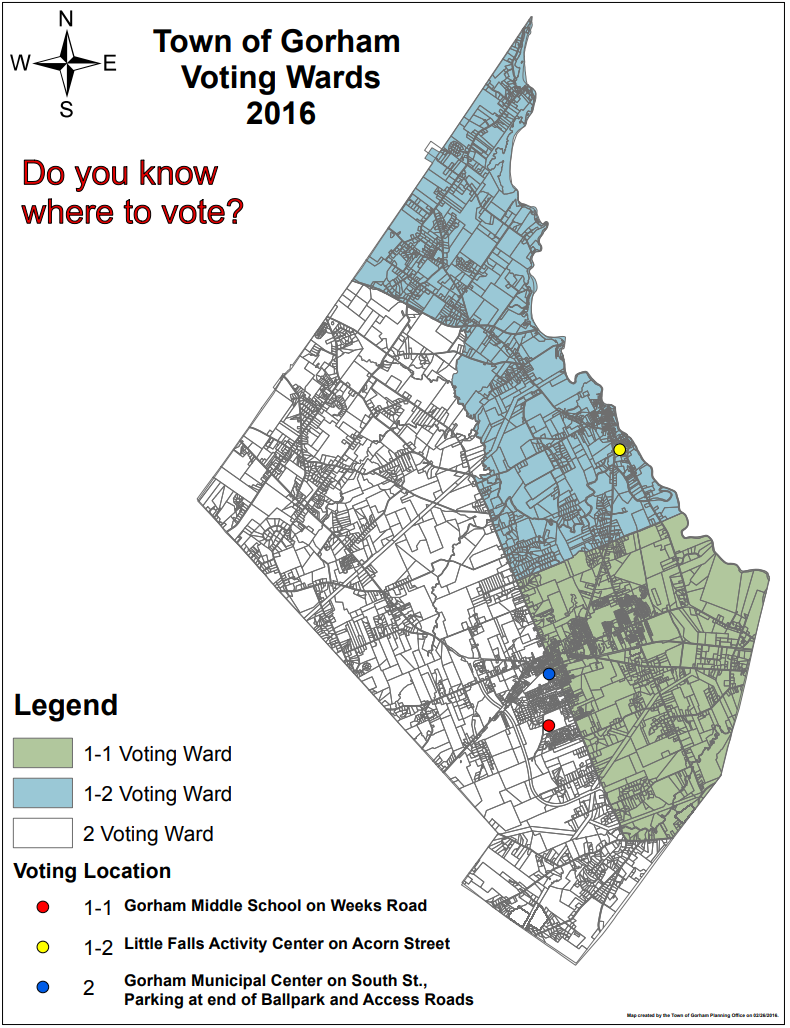

source-https://www.gorham-me.org/sites/g/files/vyhlif4456/f/uploads/voting_ward_map.pdf

## Harpswell Precincts
VEST-VTDs for Biddeford, Ellsworth, Gorham, Harpswell were sourced from township ward maps.

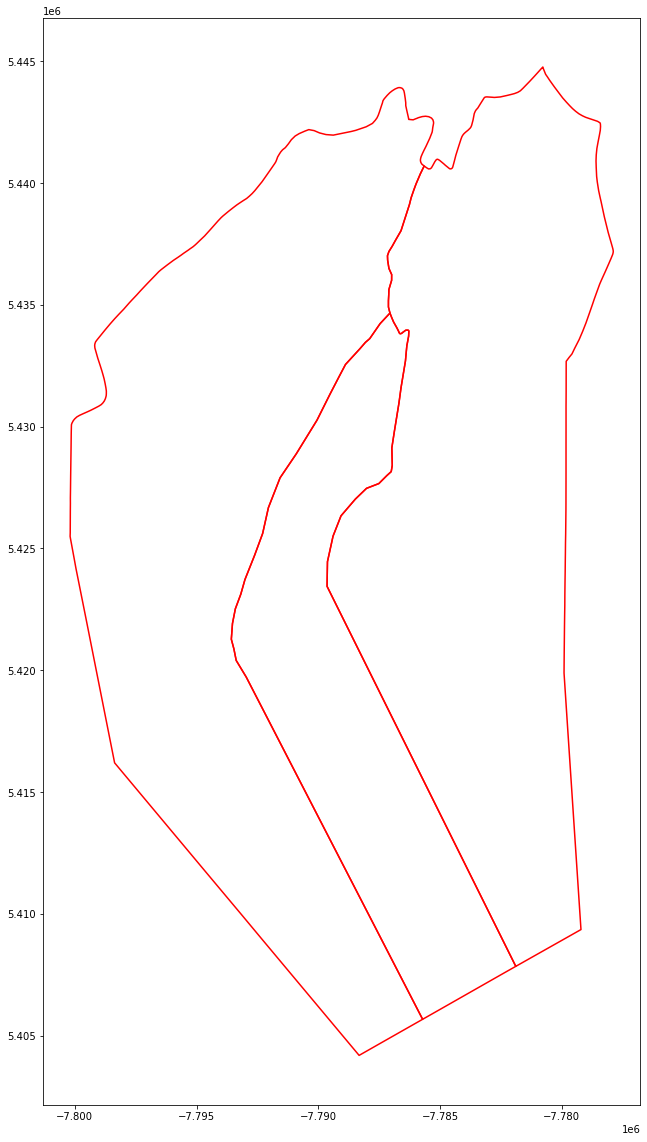

In [111]:
ax = vest_shp[vest_shp['NAME'].str.contains('Harpswell')].boundary.plot(figsize=(20,20),color="red")

### Could not find precinct map for Harpswell